# Comparative Evaluation of Unsupervised Learning Models for Customer Segmentation

## Introduction
In this notebook, we will compare the performance of different unsupervised learning models for customer segmentation. Customer segmentation is a critical strategic tool in the financial services industry, offering a myriad of benefits that enhance operational efficiency, customer satisfaction, and profitability. By dividing a heterogeneous customer base into distinct, homogenous groups based on specific characteristics and behaviors, financial institutions can tailor their products, services, and marketing efforts to meet the unique needs of each segment. This targeted approach leads to more personalized customer experiences, fostering loyalty and retention.

In financial services, customer segmentation aids in risk management by identifying high-risk and low-risk customer groups, allowing institutions to develop more precise risk mitigation strategies. It also facilitates the identification of potential growth opportunities by uncovering underserved market segments. Furthermore, segmentation supports the optimization of resource allocation, ensuring that marketing and operational efforts are focused on the most lucrative customer groups.

Overall, effective customer segmentation drives competitive advantage by enabling financial institutions to deliver more relevant and valuable offerings, thus improving customer acquisition, satisfaction, and retention while maximizing financial performance.

## Dataset
Citation: Bhasin, A. (2013). CC Data. Kaggle. https://www.kaggle.com/datasets/arjunbhasin2013/ccdata
The "CC Data" dataset, curated by Arjun Bhasin, is a comprehensive collection of credit card usage information aimed at facilitating the study of customer segmentation. This dataset comprises detailed attributes related to the spending behavior and payment patterns of credit card users. It includes features such as balance, purchases, one-off purchases, installments purchases, cash advances, credit limit, payment amounts, and more. These attributes enable a nuanced analysis of customer behavior, making the dataset particularly valuable for developing and evaluating various unsupervised learning models in the context of customer segmentation. The dataset is publicly available on Kaggle.

## Research Steps
1. Data Acquisition and Preparation: Obtain the "CC Data" dataset from Kaggle, ensuring it is preprocessed for analysis. This involves cleaning the data, handling missing values, and normalizing features to ensure consistency and accuracy in subsequent analyses.

2. Exploratory Data Analysis (EDA): Perform an in-depth exploratory data analysis to understand the distribution, relationships, and underlying patterns within the dataset. This step includes visualizing the data, identifying key variables, and gaining insights into customer behaviors.

3. Model Selection: Identify and select a range of unsupervised learning models suitable for customer segmentation. Potential models include K-means clustering, hierarchical clustering, and DBSCAN, among others.

4. Model Implementation and Training: Implement and train the selected unsupervised learning models on the preprocessed dataset. This involves configuring model parameters, executing the algorithms, and ensuring proper convergence.

5. Model Evaluation: Assess the efficacy of each model using appropriate evaluation metrics such as silhouette score, Davies-Bouldin index, and other cluster validation techniques. Compare the performance of the models to determine the most effective approach for customer segmentation.

6. Cluster Analysis: Analyze the resulting clusters to interpret the characteristics and behaviors of different customer segments. This includes examining the centroids, cluster sizes, and the distribution of key attributes within each segment.

7. Discussion and Implications: Discuss the findings from the cluster analysis, highlighting the implications for financial institutions. Explore how the identified segments can inform strategic decisions in product development, marketing, and risk management.

8. Conclusion and Recommendations: Summarize the research findings and provide recommendations for future work. Suggest potential improvements to the segmentation models and propose areas for further research to enhance the understanding and application of customer segmentation in financial services.

### 1. Data Acquisition and Preparation


In [1]:
import warnings
import clr
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shc

warnings.filterwarnings('ignore')


In [2]:
# Load the dataset
df = pd.read_csv('data/CC GENERAL.csv')

# Display the first few rows of the dataset
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
# Display the summary statistics of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
# Check for missing values in the dataset
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

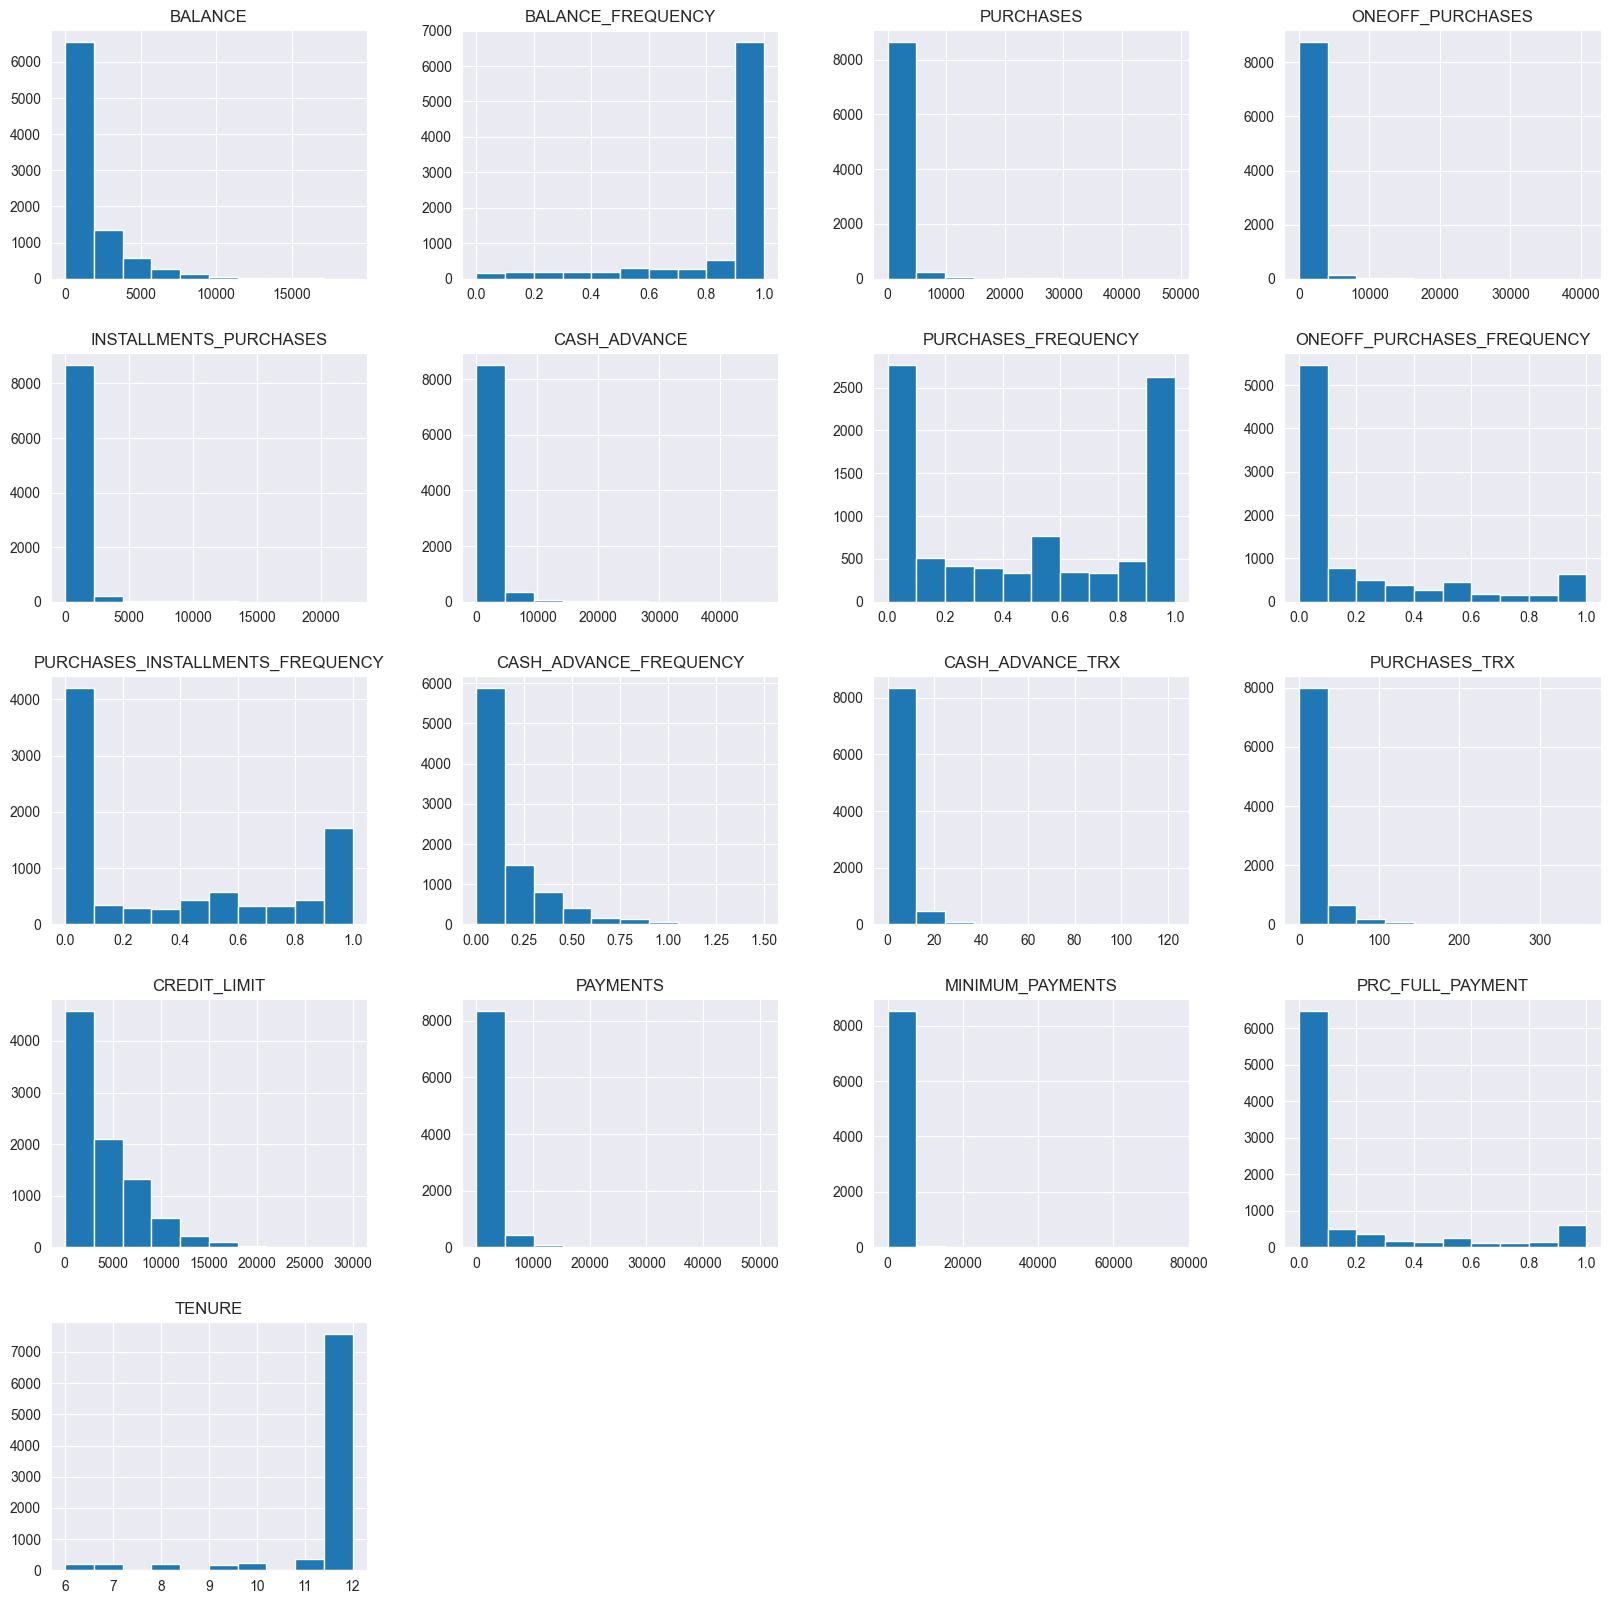

In [5]:
# hist plot of the dataset
df.hist(figsize=(20, 20))
plt.show()

The histograms provide a visual representation of the distribution of each numerical variable in the dataset. The key observations from these histograms are as follows:
- Balance: The distribution is right-skewed, indicating that most customers have relatively low balances, with a few having significantly higher balances.
- Balance Frequency: The majority of the customers have a balance frequency close to 1.0, suggesting frequent usage or checking of their account balances.
- Purchases and One-off Purchases: Both variables are heavily right-skewed, showing that most customers have low purchase amounts with occasional high-value purchases.
- Installments Purchases: Similar to other purchase-related variables, this also shows a right-skewed distribution with most values being low.
- Cash Advance: The distribution indicates that a few customers take large cash advances, while the majority take little to none.
- Frequency Variables (Purchases, One-off Purchases, Installments Purchases, and Cash Advances): These frequencies are generally low, with most customers having low frequency values.
- Credit Limit: The distribution shows a significant number of customers having a low credit limit, with fewer customers enjoying higher credit limits.
- Payments and Minimum Payments: Both are right-skewed, indicating that while most customers make low payment amounts, a few make significantly higher payments.
- PRC Full Payment: The histogram shows a large number of customers making full payments infrequently.
- Tenure: Most customers have a tenure of 12 months, indicating a common duration of engagement with the service.

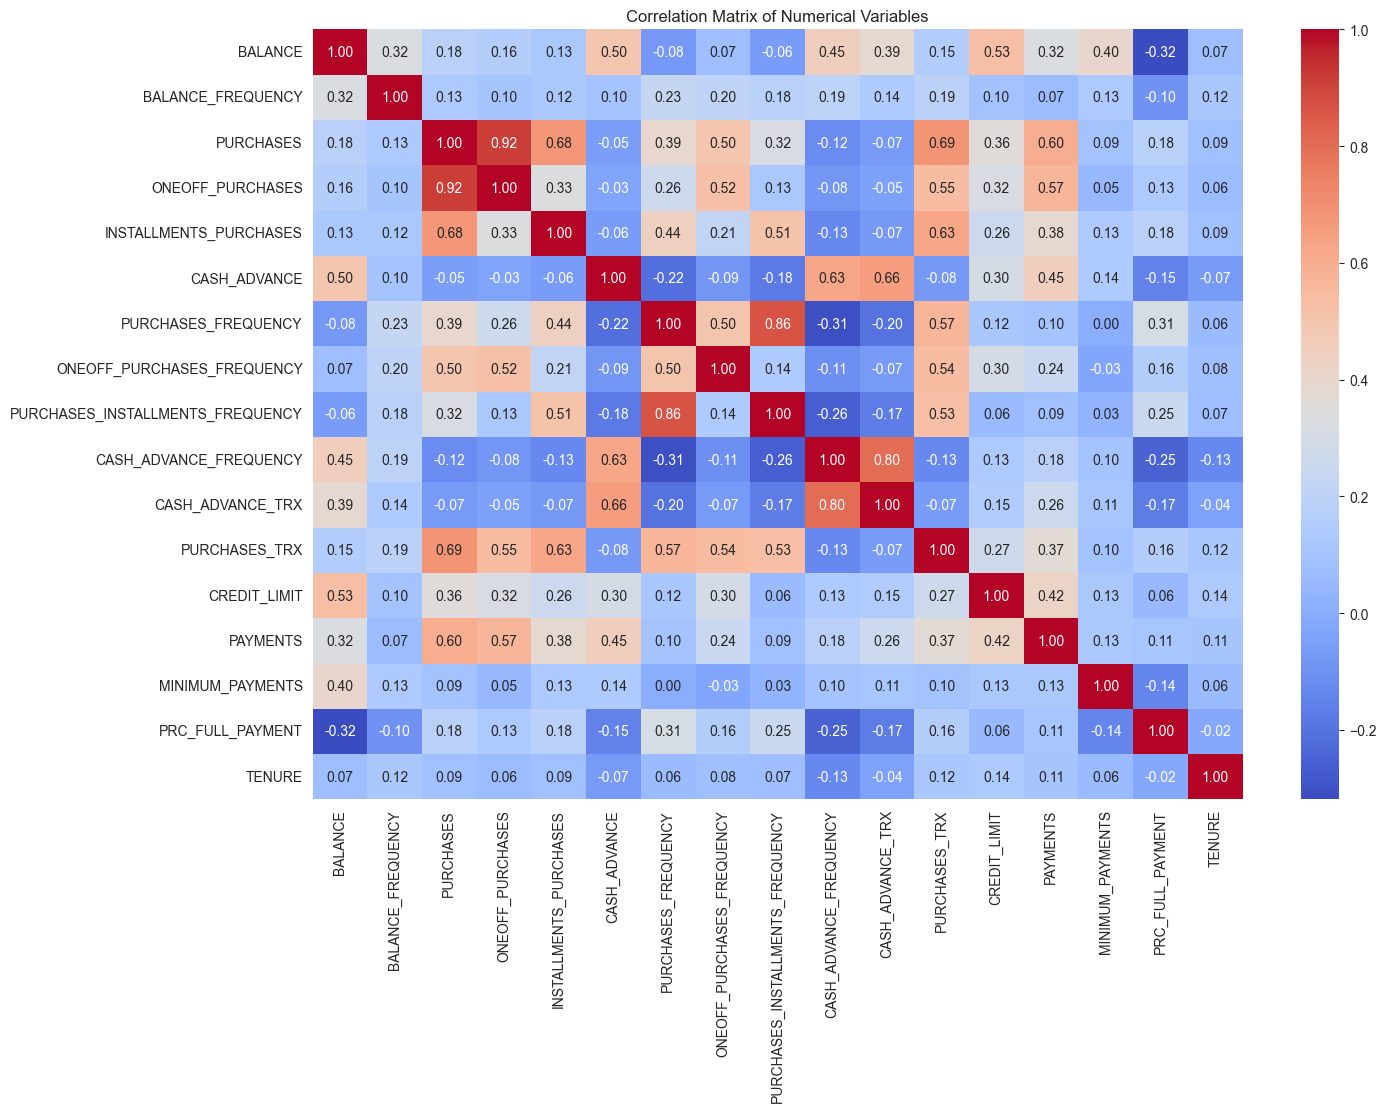

In [6]:
# Correlation matrix of the numerical variables
# drop the CUST_ID column as it is not relevant for correlation analysis
corr = df.drop('CUST_ID', axis=1).corr()

# plot the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

The correlation matrix provides insights into the relationships between numerical variables. Key observations include:

- Purchases and One-off Purchases: There is a strong positive correlation (0.92), indicating that customers who make one-off purchases also tend to have higher overall purchase amounts.
- Cash Advance and Cash Advance Frequency: A strong positive correlation (0.63) suggests that customers who take larger cash advances tend to do so more frequently.
- Purchases and Installments Purchases: A moderate positive correlation (0.68) indicates that higher overall purchases are associated with higher installment purchases.
- Purchases and Cash Advance: There is a moderate positive correlation (0.50), implying that customers with higher purchase amounts also tend to take larger cash advances.
- Credit Limit and Balance: The correlation (0.53) suggests that customers with higher credit limits tend to maintain higher balances.
- Payments and Purchases: A positive correlation (0.57) shows that customers with higher purchase amounts also tend to make higher payments.
- PRC Full Payment and Purchases: The correlation is relatively low, indicating that the proportion of full payments does not strongly correlate with purchase amounts.

#### Data Profiling Summary:
- Missing Values: The dataset contains missing values in the CREDIT_LIMIT (1 missing value) and MINIMUM_PAYMENTS (313 missing values) columns.

- Distribution Characteristics: Most columns have a substantial number of zero values and exhibit a high degree of right-skewness, as evidenced by the histograms and the comparison of mean and median values. Typically, the mean values are smaller than the median values, indicating skewness.

- Correlation Insights: Several variables exhibit moderate to high correlations with other variables, with correlation coefficients ranging from 0.5 to 1. Notably, PURCHASES and ONEOFF_PURCHASES have a high correlation of 0.92, while CASH_ADVANCE_TRX and CASH_ADVANCE_FREQUENCY show a correlation of 0.8.

- Customer Tenure Preference: The majority of credit card customers prefer a 12-month tenure, suggesting a tendency to repay credits over a longer term, which potentially incurs higher interest rates.

- Balance and Purchases Analysis: Further investigation into the BALANCE column reveals numerous credit cards with zero balances. This finding is corroborated by the high number of zero purchase amounts in the PURCHASE column. It is inferred that some users might intentionally maintain low balances to achieve a higher credit limit, thereby improving their credit utilization ratio and credit score.

- Usage Frequency: Most credit card accounts score 1 in the BALANCE_FREQUENCY column, indicating frequent usage of credit cards by customers. However, this frequent usage does not extend to one-time transactions (ONEOFF_PURCHASES) and installment payments (PURCHASES_INSTALLMENT_FREQUENCY), where the majority of customers do not engage in these types of transactions.

### 2. Exploratory Data Analysis (EDA)

We will conduct an exploratory data analysis to gain insights into the distribution, relationships, and patterns within the dataset. This analysis will involve visualizing the data, identifying key variables, and exploring customer behaviors based on the available attributes. In particular, we will focus on the relationships between key variables such as balance, credit limit, and purchase behavior to uncover patterns that can inform customer segmentation strategies.

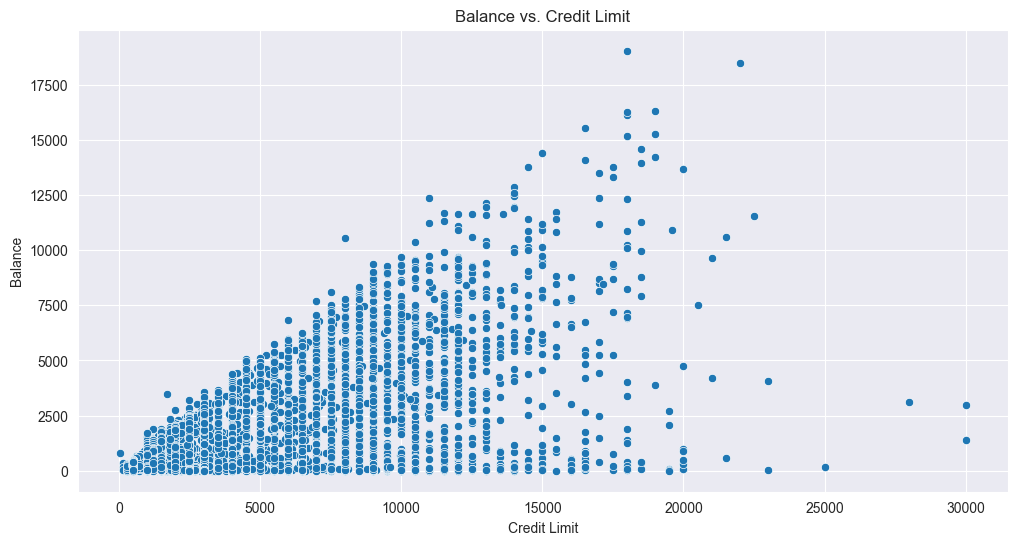

In [7]:
# Balance vs. Credit Limit
plt.figure(figsize=(12, 6))
sns.scatterplot(x='CREDIT_LIMIT', y='BALANCE', data=df)
plt.title('Balance vs. Credit Limit')
plt.xlabel('Credit Limit')
plt.ylabel('Balance')
plt.show()

The scatter plot of Balance versus Credit Limit provides several key insights into the expected behavior of customers:

- Positive Correlation: There is a clear positive correlation between balance and credit limit. Customers with higher credit limits tend to maintain higher balances on their credit cards. This relationship is logical as higher credit limits likely provide customers with greater spending capacity, leading to higher balances.

- Clustered Patterns: The plot shows a dense cluster of data points at lower credit limits and balances. Most customers have credit limits and balances below 10,000. This indicates that a significant portion of the customer base operates within these financial limits, suggesting a conservative credit allocation and usage pattern.

- Wide Dispersion at Higher Limits: At higher credit limits (above 10,000), the dispersion of balance values increases. This indicates variability in customer behavior, with some maintaining low balances despite high credit limits, while others utilize a substantial portion of their available credit.

- Heteroscedasticity: The data shows signs of heteroscedasticity, as evidenced by the increasing variance in balances with higher credit limits. This phenomenon indicates that the variability in customer balances grows with increasing credit limits. In other words, as customers are granted higher credit limits, their balance behaviors become more varied and less predictable.

- Low Utilization Cases: There are notable instances where customers with high credit limits maintain very low balances. This could indicate disciplined financial behavior, where customers are not fully utilizing their available credit, possibly to maintain a low credit utilization ratio, which can positively impact their credit scores.

- High Utilization Cases: Conversely, some customers with high credit limits also maintain high balances, which could imply heavy reliance on credit or high spending patterns. These customers might be using their credit cards extensively, either for regular expenses or significant purchases.

The scatter plot highlights a general trend where higher credit limits are associated with higher balances, but also reveals substantial variability in customer behavior at higher credit limits. The presence of heteroscedasticity suggests that financial behaviors become more diverse with increasing credit limits, underscoring the need for tailored financial management strategies for different customer segments. These insights can inform credit allocation policies, risk management practices, and customer engagement strategies to better cater to varying customer needs and behaviors.

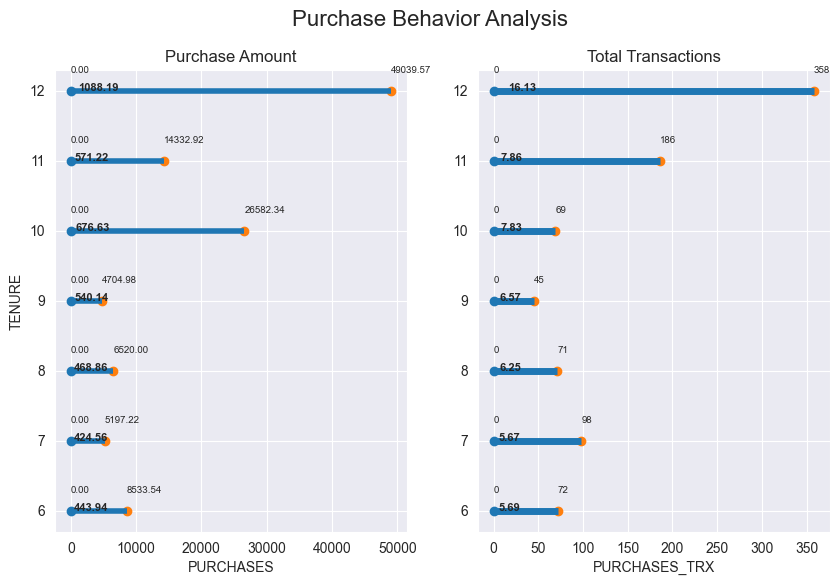

In [8]:
import matplotlib.pyplot as plt

# Purchase Behavior Analysis
tenure = sorted(df['TENURE'].unique())

# --- EDA 2.1 Data Frame ---
eda2_1 = df[['PURCHASES', 'TENURE']]
eda2_1 = eda2_1.groupby('TENURE').agg(MIN=('PURCHASES', 'min'), AVG=('PURCHASES', 'mean'), MAX=('PURCHASES', 'max')).reset_index()

# --- EDA 2.2 Data Frame ---
eda2_2 = df[['PURCHASES_TRX', 'TENURE']]
eda2_2 = eda2_2.groupby('TENURE').agg(MIN=('PURCHASES_TRX', 'min'), AVG=('PURCHASES_TRX', 'mean'), MAX=('PURCHASES_TRX', 'max')).reset_index()

# --- EDA 2.1 & 2.2 Settings ---
fig = plt.figure(figsize=(10, 6))
plt.suptitle('Purchase Behavior Analysis', fontsize=16)

# --- EDA 2.1 (Left Dumbbell) ---
plt.subplot(1, 2, 1)
axs_left = plt.gca()
plt.scatter(x=eda2_1['MIN'], y=eda2_1['TENURE'])
plt.scatter(x=eda2_1['MAX'], y=eda2_1['TENURE'])
for i in range(len(tenure)):
    eda2_1_x = eda2_1[eda2_1['TENURE'] == tenure[i]]
    plt.hlines(y=eda2_1_x['TENURE'], xmin=eda2_1_x['MIN'], xmax=eda2_1_x['MAX'], linewidth=4)
    plt.annotate('{0:.2f}'.format(eda2_1_x['MIN'].values[0]), xy=(eda2_1_x['MIN'].values[0], eda2_1_x['TENURE'].values[0]+0.25), fontsize=7)
    plt.annotate('{0:.2f}'.format(eda2_1_x['AVG'].values[0]), xy=(eda2_1_x['AVG'].values[0], eda2_1_x['TENURE'].values[0]), fontsize=8, fontweight='bold')
    plt.annotate('{0:.2f}'.format(eda2_1_x['MAX'].values[0]), xy=(eda2_1_x['MAX'].values[0], eda2_1_x['TENURE'].values[0]+0.25), fontsize=7)
plt.xlabel('PURCHASES')
plt.ylabel('TENURE')
plt.title('Purchase Amount')

# --- EDA 2.2 (Right Dumbbell) ---
plt.subplot(1, 2, 2)
axs_right = plt.gca()
plt.scatter(x=eda2_2['MIN'], y=eda2_2['TENURE'])
plt.scatter(x=eda2_2['MAX'], y=eda2_2['TENURE'])
for i in range(len(tenure)):
    eda2_2_x = eda2_2[eda2_2['TENURE'] == tenure[i]]
    plt.hlines(y=eda2_2_x['TENURE'], xmin=eda2_2_x['MIN'], xmax=eda2_2_x['MAX'], linewidth=5)
    plt.annotate('{:.0f}'.format(eda2_2_x['MIN'].values[0]), xy=(eda2_2_x['MIN'].values[0], eda2_2_x['TENURE'].values[0]+0.25), fontsize=7)
    plt.annotate('{0:.2f}'.format(eda2_2_x['AVG'].values[0]), xy=(eda2_2_x['AVG'].values[0], eda2_2_x['TENURE'].values[0]), fontsize=8, fontweight='bold')
    plt.annotate('{:.0f}'.format(eda2_2_x['MAX'].values[0]), xy=(eda2_2_x['MAX'].values[0], eda2_2_x['TENURE'].values[0]+0.25), fontsize=7)
plt.xlabel('PURCHASES_TRX')
plt.ylabel('')
plt.title('Total Transactions')
plt.show()


The comparative plots of Account Purchases Amount and Purchase Total Transactions against Tenure provide insights into the purchase behaviors of credit card customers over different tenures.

- Account Purchases Amount: Highest Purchases at 12 Months: Customers with a tenure of 12 months exhibit the highest average purchase amount, peaking at approximately 49,039.57. This suggests that long-term customers are likely to spend more using their credit cards.

- Significant Purchases at 10 Months: Another notable peak occurs at 10 months, with an average purchase amount of around 26,582.34. This indicates a second group of high-spending customers at this specific tenure duration.

- Gradual Decrease in Mid-Tenure: For tenures ranging from 6 to 9 months, the average purchase amount tends to be lower, with values fluctuating but generally staying below 10,000. This could imply that mid-term customers might have either settled into moderate spending patterns or are still in the process of increasing their spending as their tenure progresses.

- Purchase Total Transactions: Highest Transaction Count at 12 Months: Similar to the purchase amount, the number of total purchase transactions is highest for customers with a tenure of 12 months, with an average of 358 transactions. This indicates that long-term customers not only spend more but also engage in more frequent transactions.

- Moderate Transaction Peaks at 10 and 11 Months: Customers with tenures of 10 and 11 months show moderate peaks in transaction counts, with averages of 186 and 69 transactions respectively. This suggests increased activity as customers approach longer tenures.

- Lower Transaction Counts in Mid-Tenure: For tenures between 6 and 9 months, the average number of transactions remains relatively low, with the highest being around 98 transactions at 7 months. This again suggests that customers in mid-tenure might be either cautious or gradually increasing their transaction frequency.

- Long-Term Customers: Customers with a tenure of 12 months consistently demonstrate higher spending and transaction frequency, indicating that longer tenure is associated with increased engagement and utilization of credit card services. These customers are likely more comfortable with their credit limits and usage, potentially leading to higher loyalty and profitability for the financial institution.

- Mid-Tenure Customers: Those in the mid-tenure range (6-9 months) show lower spending and transaction activity. This could be due to a cautious approach as they get accustomed to their credit cards or a gradual increase in their spending habits as their comfort and trust in the service grow.

- High-Spending Segments: Specific tenures such as 10 and 11 months also exhibit notable spending and transaction activity, indicating potential high-value segments that could be targeted for personalized offers and engagement strategies to further enhance their spending behavior.

The analysis of purchase behaviors by tenure underscores the importance of understanding customer tenure dynamics. Financial institutions can leverage these insights to tailor their marketing and customer retention strategies, focusing on high-value segments and nurturing mid-tenure customers to enhance their engagement and spending over time. The clear evidence of higher spending and transaction activity among long-term customers highlights the potential benefits of fostering long-term relationships with credit card users.

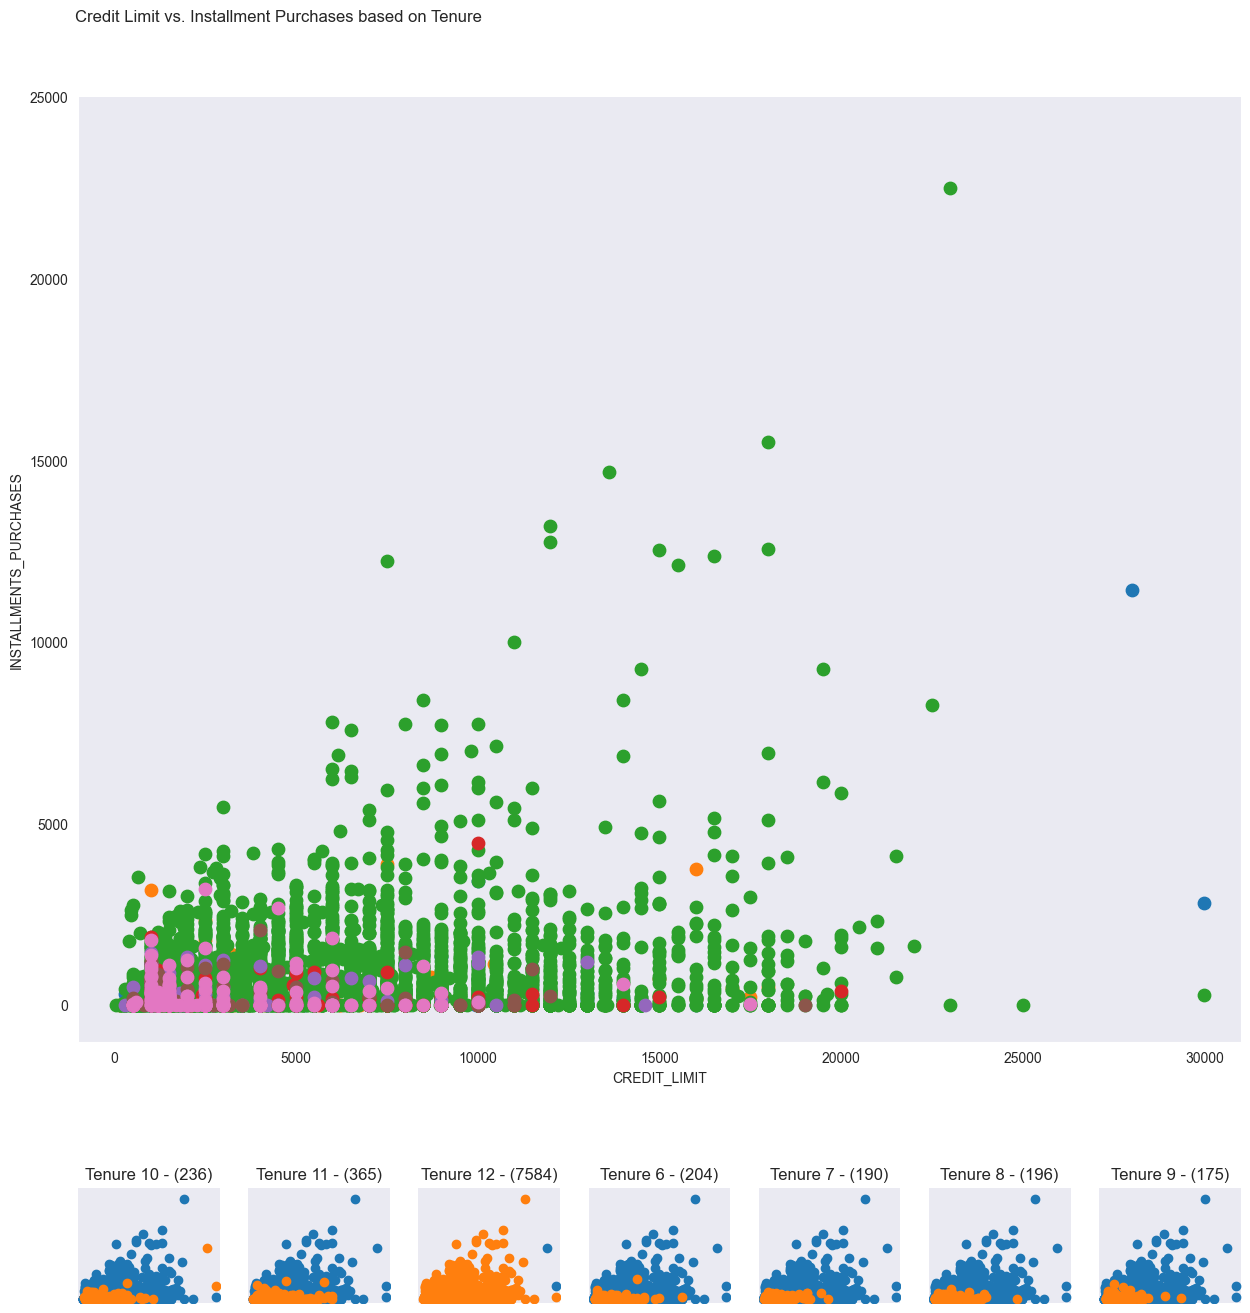

In [9]:
import matplotlib.pyplot as plt

# Credit Limit vs. Installment Purchases based on Tenure

# --- EDA 3 Data Frame ---
eda1 = df[['CREDIT_LIMIT', 'BALANCE', 'TENURE']]
eda1['TENURE'] = eda1['TENURE'].astype(str)
tenure = sorted(eda1['TENURE'].unique())
eda3 = df[['CREDIT_LIMIT', 'INSTALLMENTS_PURCHASES', 'TENURE']]
eda3['TENURE'] = eda1['TENURE'].astype(str)
tenure = sorted(eda1['TENURE'].unique())

# --- EDA 3 Settings ---
fig = plt.figure(figsize=(15, 20))
gs = fig.add_gridspec(7, 7)
ax = fig.add_subplot(gs[:7, :])
ax.set_aspect(1)

# --- EDA 3: Main Scatter Plot ---
for x in range(len(tenure)):
    eda3_x = eda3[eda3['TENURE'] == tenure[x]]
    ax.scatter(eda3_x['CREDIT_LIMIT'], eda3_x['INSTALLMENTS_PURCHASES'], s=80)
ax.set_xlabel('CREDIT_LIMIT')
ax.set_ylabel('INSTALLMENTS_PURCHASES')
ax.grid(axis='y')
ax.grid(axis='x')
for spine in ax.spines.values():
    spine.set_visible(False)
for spine in ['bottom', 'left']:
    ax.spines[spine].set_visible(True)

sub_axes = [None] * 7
# --- EDA 3: Sub Plots ---
for idx, tnr in enumerate(tenure):
    sub_axes[idx] = fig.add_subplot(gs[6, idx], aspect=1)
    sub_axes[idx].scatter(eda3[eda3['TENURE'] != tnr]['CREDIT_LIMIT'], eda3[eda3['TENURE'] != tnr]['INSTALLMENTS_PURCHASES'])
    sub_axes[idx].scatter(eda3[eda3['TENURE'] == tnr]['CREDIT_LIMIT'], eda3[eda3['TENURE'] == tnr]['INSTALLMENTS_PURCHASES'])
    cnt = (eda3['TENURE'] == tnr).sum()
    sub_axes[idx].set_title(f'Tenure {tnr} - ({cnt})')
    sub_axes[idx].set_xticks([])
    sub_axes[idx].set_yticks([])
    for spine in sub_axes[idx].spines.values():
        spine.set_visible(False)

# --- EDA 3 XY Limit ---
for axes in [ax] + sub_axes:
    axes.set_xlim(-1000, 31000)
    axes.set_ylim(-1000, 25000)

# --- EDA 3 Title ---
plt.suptitle('Credit Limit vs. Installment Purchases based on Tenure', x=0.123, y=0.775, ha='left')

plt.show()


The scatter plot of Credit Limit versus Installment Purchases, differentiated by customer tenure, provides several insights into customer behavior:
- Concentration of Installment Purchases: A majority of the installment purchases are concentrated at lower credit limits (below 10,000). This indicates that most customers who engage in installment purchases have relatively modest credit limits. Installment purchase amounts predominantly range below 5,000, suggesting that customers generally prefer smaller installment plans regardless of their credit limit.
- High Installment Purchases and High Credit Limits: A smaller group of customers with higher credit limits (above 10,000) show a more varied pattern in installment purchases, with some reaching amounts as high as 25,000. This indicates that customers with higher credit limits are more likely to utilize installment purchases for larger amounts. These high-value installment purchases are relatively infrequent but are more noticeable among customers with extensive credit limits, highlighting a potential target segment for larger credit services.

Tenure-Based Patterns:

- Tenure 12: Customers with a tenure of 12 months are represented extensively across the plot, indicating that long-term customers are actively engaged in both utilizing their credit limits and participating in installment purchases.
- Mid-Tenure (6-11 months): These customers show a dense concentration of installment purchases at lower credit limits. This suggests a conservative approach in the earlier stages of their tenure, potentially indicating a gradual increase in trust and spending behavior over time.
- Shorter Tenure (less than 6 months): This group is less represented, suggesting that newer customers might either have lower credit limits or are less inclined to use installment purchases.

Heterogeneity in High Tenure Groups:
- Customers with longer tenures (10, 11, and 12 months) exhibit a broader range of installment purchases across various credit limits. This indicates increasing heterogeneity in spending behavior, with some customers taking advantage of their higher credit limits for significant purchases, while others maintain lower balances and installment amounts.

Customer Maturity and Spending Behavior: As customers' tenure increases, there is a noticeable shift towards higher installment purchase amounts, particularly among those with higher credit limits. This suggests that customer maturity (as indicated by longer tenure) correlates with increased financial engagement and trust in utilizing available credit resources for larger purchases.

Segmented Targeting for Financial Products: The differentiation in behavior based on tenure and credit limit underscores the importance of segmented marketing and financial product offerings. For example, customers with higher credit limits and longer tenures might be prime candidates for premium credit products and larger installment plans.

Conservative Spending in Initial Tenures: The conservative spending behavior observed in customers with mid to short tenures indicates a cautious approach towards credit utilization. Financial institutions can focus on nurturing these customers through tailored educational programs and personalized credit-building products to gradually increase their financial engagement.

The scatter plot analysis reveals that installment purchases are predominantly concentrated at lower credit limits but exhibit significant variability as credit limits increase, particularly among long-term customers. These insights highlight the need for financial institutions to adopt a nuanced approach in their credit offerings and customer engagement strategies, catering to the diverse spending behaviors across different customer segments and tenures.

#### Data Cleaning and Imputation:
The K-Nearest Neighbors Imputer (KNNImputer) is utilized to address missing values in the dataset. This method involves imputing missing values based on the mean values from the nearest n neighbors identified within the dataset. Specifically, for each sample with missing data, the algorithm searches for the n closest samples (neighbors) that contain complete data. The missing values are then replaced with the mean value of the corresponding feature from these nearest neighbors.

The primary rationale for employing the KNNImputer in this clustering context is to minimize bias that could potentially distort the clustering results. Unlike simple imputation methods such as mean or median imputation, KNNImputer leverages the similarity between samples, ensuring that the imputed values are representative of the underlying data structure. This approach maintains the inherent relationships between features, thereby preserving the dataset's integrity and improving the robustness of the clustering analysis.

By using KNNImputer, the imputation process becomes adaptive to the local data patterns, leading to more accurate and contextually relevant imputations. This method is particularly beneficial in scenarios where the dataset exhibits complex, non-linear relationships among features, as it captures the local dependencies and variations more effectively than global imputation methods.

In [10]:
# data preparation and impuation
# we dont need the customer id column
df = df.drop('CUST_ID', axis=1)

# Impute missing values using the KNNImputer method to handle the missing values in the dataset.
from sklearn.impute import KNNImputer

# Initialize the KNNImputer with 5 nearest neighbors
imputer = KNNImputer(n_neighbors=5)

# Impute the missing values in the dataset
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Check if there are any missing values after imputation
df_imputed.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

#### Feature Scaling:
Scaling is a crucial preprocessing step that standardizes the dataset's features, transforming them into a defined range using a linear transformation. In this context, the Standard Scaler is employed, which standardizes each feature by removing the mean and scaling it to unit variance. This method ensures that each feature contributes equally to the analysis, preventing any single feature from dominating due to its scale.

The primary rationale for scaling is to manage the variability within the dataset, which is essential for producing high-quality clusters and enhancing the precision of clustering algorithms. Without scaling, features with larger ranges can disproportionately influence the clustering process, leading to biased results. By standardizing the features, scaling ensures that all features are treated equally, thereby improving the accuracy and robustness of the clustering analysis.

Moreover, scaling is particularly important in clustering algorithms that rely on distance metrics, such as K-means clustering, where unscaled data can result in incorrect distance calculations and, consequently, poor clustering performance. By using a Standard Scaler, the dataset is transformed into a standardized format, facilitating more reliable and interpretable clustering outcomes. This preprocessing step ultimately contributes to the overall effectiveness and validity of the clustering model.

In [11]:
# Feature Scaling using Standard Scaler
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the dataset
df_scaled = pd.DataFrame(scaler.fit_transform(df_imputed), columns=df_imputed.columns)

# Check for negative values in the scaled dataset
min_value = df_scaled.min().min()
if min_value < 0:
    df_scaled += abs(min_value)

# Display the scaled dataset
df_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3.390778,3.873333,3.697868,3.765834,3.773689,3.655982,3.316277,3.444107,3.415454,3.447419,3.646698,3.611434,3.162432,3.593789,3.818955,3.597217,4.483447
1,4.909728,4.257092,3.653216,3.765834,3.668191,6.728372,2.901010,3.444107,3.205772,4.696730,4.232841,3.530972,4.811464,4.941410,4.216323,4.356994,4.483447
2,4.569903,4.640851,4.015099,4.231656,3.668191,3.655982,5.392611,6.796219,3.205772,3.447419,3.646698,4.013747,4.948883,3.738963,4.026738,3.597217,4.483447
3,4.171867,3.105815,4.354825,4.668957,3.668191,3.754114,3.108642,3.723448,3.205772,3.863854,3.793234,3.571203,4.948883,3.524079,3.921327,3.597217,4.483447
4,3.763992,4.640851,3.660705,3.775473,3.668191,3.655982,3.108642,3.723448,3.205772,3.447419,3.646698,3.571203,3.217400,3.758400,3.863803,3.597217,4.483447


#### Hopkins Test for Measuring Clustering Tendency

The Hopkins test is a statistical method used to assess the clustering tendency of a dataset. Clustering tendency refers to the propensity of a dataset to form clusters. The Hopkins statistic provides a quantitative measure to determine whether a dataset is significantly clusterable or if it is uniformly distributed.

The test involves the following steps:

1. **Random Sample Selection**: Select a random sample of size $(n)$ from the dataset.
2. **Uniformly Distributed Points**: Generate a set of uniformly distributed points of the same size $(n)$ within the same data space.
3. **Nearest Neighbor Distances**: Calculate the nearest neighbor distances from the random sample points to the original dataset $(( w_i ))$ and from the uniformly distributed points to the original dataset $(( u_i ))$.
4. **Compute the Hopkins Statistic**: The Hopkins statistic $(( H ))$ is then calculated as:

$$\[ H = \frac{\sum_{i=1}^{n} w_i}{\sum_{i=1}^{n} w_i + \sum_{i=1}^{n} u_i} \]$$


Where:
- $( w_i )$ is the distance from the $(i)-th$ randomly selected data point to its nearest neighbor in the dataset.
- $( u_i )$ is the distance from the $(i)-th$ uniformly generated point to its nearest neighbor in the dataset.

The value of $( H )$ ranges from 0 to 1:
- **$( H \approx 0.5)$**: Indicates that the dataset is uniformly distributed and does not have a significant clustering tendency.
- **$( H \approx 0)$**: Suggests that the dataset is highly clusterable, as the uniformly generated points are farther from the data points than the random sample points.
- **$( H \approx 1)$**: Also indicates high clusterability, but this scenario is less common and typically implies that the dataset is already clustered or has inherent groupings.

The Hopkins test provides an objective measure of the clustering tendency, helping researchers and data scientists decide whether clustering algorithms are appropriate for a given dataset. It is especially useful as a preliminary step before applying clustering techniques, ensuring that the dataset has an intrinsic structure that can be effectively exploited by clustering algorithms. By confirming the presence of clusters, the Hopkins test guides the selection of suitable clustering methods and enhances the reliability of the subsequent analysis.

In [12]:
# Hopkins Test for Measuring Clustering Tendency
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np

def hopkins(X):
    d = X.shape[1]
    n = len(X)
    m = int(0.1 * n)
    nbrs = NearestNeighbors(n_neighbors=2).fit(X)
 
    rand_X = sample(range(n), m)
    ujd = np.zeros(m)
    wjd = np.zeros(m)
 
    for j in range(m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X, axis=0), np.amax(X, axis=0), d).reshape(1, -1))
        ujd[j] = u_dist[0][1]
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1))
        wjd[j] = w_dist[0][1]
 
    H = ujd.sum() / (ujd.sum() + wjd.sum())
    return 0 if np.isnan(H) else H

hopkins_value = hopkins(df_scaled)
print(f'.: Hopkins Test :.')
print('*' * 19)
print(f'Result: {hopkins_value:.4f}')
if 0.7 < hopkins_value < 0.99:
    print('>> From the result above, it has a high tendency to cluster (contains meaningful clusters)')
    print('\n' + '*' * 31)
    print('.:. Conclusions: Accept H0 .:.')
    print('*' * 31)
else:
    print('>> From the result above, it has no meaningful clusters')
    print('\n' + '*' * 31)
    print('.:. Conclusions: Reject H0 .:.')
    print('*' * 31)

.: Hopkins Test :.
*******************
Result: 0.9653
>> From the result above, it has a high tendency to cluster (contains meaningful clusters)

*******************************
.:. Conclusions: Accept H0 .:.
*******************************


The Hopkins test result for the dataset is 0.9668. This score is significantly close to 1, indicating a high tendency for the data to cluster. In the context of the Hopkins test, a score close to 1 suggests that the dataset contains meaningful clusters, as the uniformly generated points are much farther from the dataset points compared to the randomly selected sample points.

Given the Hopkins score of 0.9668, we conclude that the dataset has a strong clustering tendency. This high score implies that the data points are not uniformly distributed but instead form distinct groupings or clusters.

Therefore, we accept the null hypothesis $( H \approx 0)$ that the dataset exhibits significant clustering tendency. This conclusion justifies the application of clustering algorithms to the dataset, as it is likely to contain meaningful and discernible clusters that can be effectively identified through such methods.

#### Dimensionality Reduction

To determine the most appropriate dimensionality reduction method for the customer segmentation dataset, we need to consider the characteristics of the data and the goals of the segmentation task.

Dataset Characteristics and Goals
 - Data Type: The customer segmentation dataset typically consists of various numerical features, such as balances, purchase amounts, frequencies, and credit limits.
 - Interpretability: In customer segmentation, interpretability of the segments can be crucial for business insights and decision-making.
 - Variance Preservation: Capturing the maximum variance might help in distinguishing different customer behaviors effectively.
 - Sparsity: The dataset might contain some sparse features, but it is not primarily sparse like text data.
 - Non-Negativity: Interpretability can be enhanced if the components are non-negative, as it aligns better with real-world quantities like spending and usage frequencies.
 - Evaluation of Dimensionality Reduction Methods

Principal Component Analysis (PCA): PCA captures the maximum variance in the data, useful for uncovering the underlying structure which is good for continuous numerical data. However,The resulting components can be difficult to interpret as they can have both positive and negative values.

Truncated Singular Value Decomposition (T-SVD): T-SVD is effective for handling sparse matrices and large-scale data. Similar to PCA, it might produce components that are less interpretable due to the presence of both positive and negative values. As such, it is more suited for text data or very sparse datasets.

Non-Negative Matrix Factorization (NMF): NMF produces non-negative components, enhancing interpretability and is suitable for datasets where a parts-based representation is beneficial. However, NMF might not capture as much variance as PCA but provides a more interpretable factorization.

For customer segmentation we want to capture maximum variance and therefore PCA is a good choice. However, to ensure interpretability, we will also explore Non-Negative Matrix Factorization (NMF) as an alternative method. NMF can provide more meaningful components that align with the positive nature of customer behaviors such as spending, purchase frequencies, and credit limits.

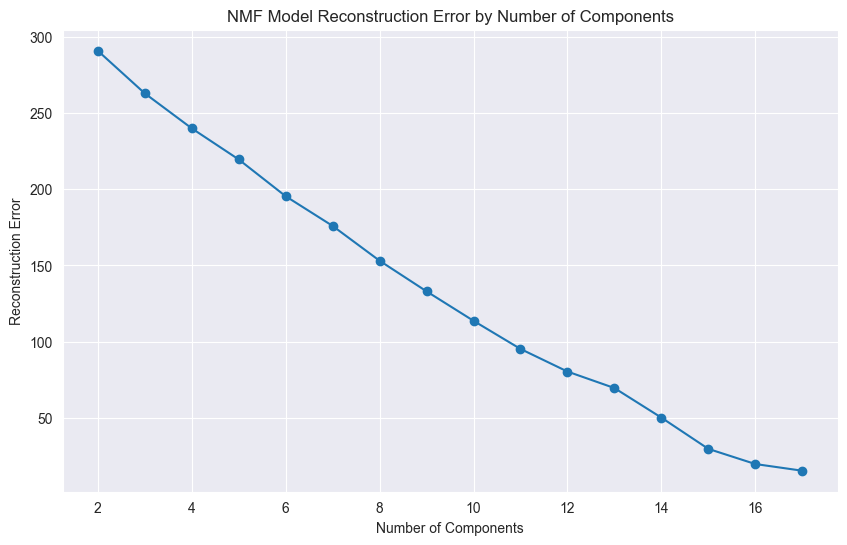

In [13]:
# Dimensionality Reduction using Non-Negative Matrix Factorization (NMF)
from sklearn.decomposition import NMF

# Initialize the NMF model with range of components where max is the total number of features
n_components_range = range(2, len(df_scaled.columns) + 1)
reconstruction_errors = []

# Fit the NMF model for each number of components
for n_components in n_components_range:
    nmf = NMF(n_components=n_components, init='random', random_state=42)
    W = nmf.fit(df_scaled)
    H = nmf.components_
    reconstruction_errors.append(nmf.reconstruction_err_)
    
# Plot the reconstruction errors
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, reconstruction_errors, marker='o')
plt.title('NMF Model Reconstruction Error by Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Reconstruction Error')
plt.grid(True)
plt.show()

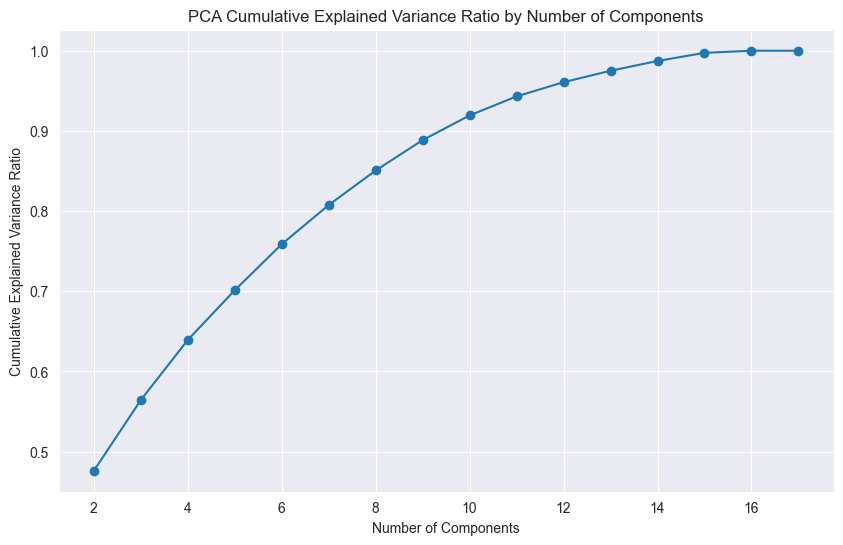

In [14]:
# Dimensionality Reduction using PCA
from sklearn.decomposition import PCA

# Initialize the PCA model with range of components where max is the total number of features
n_components_range = range(2, len(df_scaled.columns) + 1)
explained_variance_ratios = []

# Fit the PCA model for each number of components
for n_components in n_components_range:
    pca = PCA(n_components=n_components, random_state=42)
    pca.fit(df_scaled)
    explained_variance_ratios.append(pca.explained_variance_ratio_.sum())
    
# Plot the cumulative explained variance ratios
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, explained_variance_ratios, marker='o')
plt.title('PCA Cumulative Explained Variance Ratio by Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

The plot of NMF reconstruction errors against the number of components shows a clear downward trend, indicating that the reconstruction error decreases as the number of components increases. This trend suggests that adding more components helps to capture more information and reduces the reconstruction error. In selecting the optimal number of components, one common approach is to look for the "elbow point" in the plot. The elbow point is where the rate of decrease in reconstruction error starts to slow down significantly. This point represents a trade-off between the complexity of the model (number of components) and the accuracy of the reconstruction. From the provided plot, the following observations can be made:
- No prominent elbow point: The plot does not exhibit a clear elbow point where the rate of decrease in reconstruction error changes significantly.
- Midway point: There is a sharp decline in reconstruction error from 2 to 8 components, which is the mid-way point indicating that adding components in this range significantly improves the model.
- Gradual Decline: After 8 components, the decline in reconstruction error becomes more gradual. While the error continues to decrease, the rate of improvement diminishes.

The PCA cumulative explained variance ratio plot indicates that 10 components capture approximately 90% of the total variance in the dataset. This balance between information retention and model simplicity makes 10 components an optimal choice for dimensionality reduction in this context. By selecting this number of components, we ensure that the reduced dataset remains representative of the original data, facilitating effective subsequent analysis and modeling.

Using 8 to 10 components provides a balance between capturing sufficient information and maintaining a manageable model complexity. This range ensures that the model is not overly complex while still providing a substantial reduction in reconstruction error. We will proceed with 8 components for the NMF model to decompose the dataset into interpretable components for customer segmentation.

In [15]:
# Dimensionality Reduction using Non-Negative Matrix Factorization (NMF) with 8 components
n_components = 8

# Initialize the NMF model with 8 components
nmf = NMF(n_components=n_components, init='random', random_state=42)

# Fit the NMF model to the scaled dataset
W = nmf.fit_transform(df_scaled)
H = nmf.components_

# Display the shape of the decomposed matrices
print(f'Shape of W matrix: {W.shape}')
print(f'Shape of H matrix: {H.shape}')

# Display the components matrix
components_df = pd.DataFrame(H, columns=df_scaled.columns)
components_df


Shape of W matrix: (8950, 8)
Shape of H matrix: (8, 17)


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1.090611,0.010099,0.038445,0.025287,0.158594,0.760320,0.000000,0.088099,0.000000,0.426758,0.347163,0.036182,1.126908,0.389598,0.813208,0.000000,0.000000
1,0.606345,1.864837,0.610895,0.934964,0.101419,0.018730,0.469673,1.296765,0.174417,0.476279,0.416767,0.631697,0.369939,0.219426,0.261990,0.107709,2.421778
2,0.019495,0.000000,0.117624,0.125849,0.403853,0.773585,0.523141,0.246489,0.609903,0.414125,0.582752,0.123973,0.879952,0.658996,0.018497,1.865582,1.244054
3,0.796348,0.233790,0.351754,0.287700,0.546446,0.210903,0.264663,0.000000,0.398187,0.165039,0.078795,0.255873,0.127629,0.198676,2.531599,0.512005,0.000000
4,0.873521,3.090921,1.364304,1.753828,0.857935,0.473945,4.991194,5.089402,3.386421,0.740870,0.633158,2.681705,2.289230,0.000833,0.136992,3.391074,0.000000
5,0.340748,0.476081,0.146960,0.139664,0.319107,1.209195,0.201204,0.027152,0.386617,1.463410,1.488008,0.198072,0.000000,0.596990,0.000000,0.374460,0.000000
6,0.439357,0.165164,1.591580,0.844665,2.373932,0.272516,1.421920,0.000000,2.089891,0.000000,0.163092,1.742582,0.555913,1.190659,0.001357,0.000000,0.450919
7,0.197315,0.000000,3.228021,3.378368,1.633829,0.189418,0.127497,1.586214,0.000000,0.275103,0.313457,1.885931,0.315705,2.393295,0.408246,0.438311,0.000000


### 3. Unsupervised Learning Model Selection (and evaluation criteria)

**K-Means Clustering**

K-Means clustering is a widely used and straightforward algorithm suitable for scenarios where the dataset can be divided into distinct clusters with similar characteristics. The method works by partitioning the dataset into $K$ clusters, where each data point belongs to the cluster with the nearest mean value. This approach is particularly effective when the clusters are well-separated and spherical.

In customer segmentation, K-Means is highly effective when dealing with large datasets where the number of clusters (segments) can be pre-defined based on business needs or preliminary analysis. The simplicity and computational efficiency of K-Means make it suitable for real-time applications and iterative processes where the model needs to be run multiple times with different parameters to refine the segmentation.

- Ease of Implementation: The algorithm is easy to implement and computationally efficient, allowing for quick iterations and adjustments.
- Scalability: K-Means can handle large datasets efficiently, making it ideal for customer segmentation tasks involving extensive data.
- Interpretability: The results are easy to interpret, with each cluster represented by its centroid, facilitating straightforward communication of findings to stakeholders.

**DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**

DBSCAN is a powerful clustering algorithm particularly suited for datasets with noise and varying densities. Unlike K-Means, DBSCAN does not require the number of clusters to be specified in advance. Instead, it identifies clusters based on the density of data points, grouping together points that are closely packed while marking points in low-density regions as outliers.

DBSCAN is ideal for customer segmentation in scenarios where the dataset may contain noise or irregularly shaped clusters. This is often the case in real-world data where customer behavior can be highly variable and does not conform to a predefined number of segments. DBSCAN's ability to discover clusters of arbitrary shape and handle noise makes it valuable for uncovering hidden patterns in customer data.

- Handling Noise: DBSCAN is robust to noise, making it suitable for datasets with outliers or irregular patterns, which are common in customer data.
- Discovery of Arbitrary Shapes: The algorithm excels at identifying clusters of varying shapes and densities, providing more nuanced insights into customer segments.
- No Predefined Number of Clusters: The algorithm determines the number of clusters based on data density, eliminating the need for predefined cluster counts and allowing for more natural segmentation.

**Agglomerative Clustering**

Agglomerative clustering, a type of hierarchical clustering, builds clusters through a bottom-up approach, starting with each data point as its own cluster and merging the closest pairs of clusters iteratively until a stopping criterion is met. This method creates a dendrogram, which visually represents the hierarchy of clusters and can be used to decide the optimal number of clusters.

Agglomerative clustering is particularly useful in customer segmentation when there is a need to understand the hierarchical relationships between different customer segments. It provides a detailed view of how individual customers group together at various levels of granularity, which can be invaluable for strategic decision-making and understanding the broader structure of customer behavior.

- Hierarchical Insight: The dendrogram produced by agglomerative clustering offers a clear visualization of the hierarchical structure of the data, aiding in the understanding of relationships between customer segments.
- Flexibility in Cluster Selection: The method allows for the selection of different numbers of clusters at various levels of the hierarchy, providing flexibility in segmentation analysis.
- Intuitive Merging Process: The iterative merging process aligns with the natural intuition of grouping similar customers together, making the results easier to interpret and justify.

The choice between K-Means, DBSCAN, and Agglomerative Clustering for customer segmentation depends on the specific characteristics of the dataset and the goals of the analysis:
- K-Means is ideal for large datasets with well-separated, spherical clusters and a predefined number of segments.
- DBSCAN is suited for datasets with noise and varying densities, capable of discovering clusters of arbitrary shapes without requiring a predefined number of clusters.
- Agglomerative Clustering provides hierarchical insights and flexibility in cluster selection, useful for understanding the relationships between customer segments at different levels of granularity.

#### Evaluation Criteria for Clustering Models

To evaluate the performance of clustering models such as K-Means, DBSCAN, and Agglomerative Clustering, it is essential to use appropriate evaluation metrics that quantify the quality of the clusters. The following three metrics are widely used for this purpose: Davies-Bouldin Index, Silhouette Score, and Calinski-Harabasz Index. Each of these metrics provides unique insights into the clustering results and helps in comparing the performance of different clustering algorithms.

1. Davies-Bouldin Index (DBI)
The Davies-Bouldin Index measures the average similarity ratio of each cluster with its most similar cluster, considering the ratio of within-cluster distances to between-cluster distances. A lower DBI indicates better clustering, where clusters are compact and well-separated.

The DBI for a dataset with $k$ clusters is given by:

$$DBI = \frac{1}{k} \sum_{i=1}^{k} \max_{j \neq i} \left( \frac{\sigma_i + \sigma_j}{d_{i,j}} \right)$$

where:

- $\sigma_i$ is the average distance between points in cluster $i$,
- $d_{i,j}$ is the distance between cluster centroids $i$ and $j$.
- Interpretation:
  - Lower DBI: Indicates better clustering performance with compact and well-separated clusters.
  - Higher DBI: Suggests poor clustering with overlapping or dispersed clusters.

2. Silhouette Score
The Silhouette Score evaluates how similar an object is to its own cluster compared to other clusters. It ranges from -1 to 1, where a higher value indicates better-defined clusters.

Equation:
The Silhouette Score $S$ for a dataset is given by:

$$S = \frac{1}{N} \sum_{i=1}^{N} \left( \frac{b(i) - a(i)}{\max(a(i), b(i))} \right)$$

where:
- $N$ is the total number of data points,
- $a(i)$ is the average distance of point $i$ to other points in the same cluster,
- $b(i)$ is the average distance of point $i$ to points in the nearest cluster.
- Interpretation:
  - Score close to 1: Indicates that the sample is well clustered.
  - Score close to 0: Suggests that the sample is on or very close to the decision boundary between two neighboring clusters.
  - Negative score: Indicates that the sample might have been assigned to the wrong cluster.

3. Calinski-Harabasz Index (Variance Ratio Criterion)
The Calinski-Harabasz Index, also known as the Variance Ratio Criterion, evaluates the ratio of the sum of between-cluster dispersion to the sum of within-cluster dispersion. A higher score indicates better-defined clusters.

Equation:
The Calinski-Harabasz Index $(CH)$ for a dataset with $k$ clusters is given by:

$$CH = \frac{tr(B_k) / (k - 1)}{tr(W_k) / (N - k)}$$

where:
- $tr(B_k)$ is the trace of the between-cluster dispersion matrix,
- $tr(W_k)$ is the trace of the within-cluster dispersion matrix,
- $N$ is the total number of data points.
- $k$ is the number of clusters.
- Interpretation:
  - Higher CH: Indicates better clustering performance with well-separated clusters and low within-cluster dispersion.
  - Lower CH: Suggests poor clustering with high within-cluster dispersion and/or poorly separated clusters.

To evaluate the clustering models, we will compute these three metrics for each model and use them to compare the performance of different clustering algorithms. 

### 4. Model Implementation and Training
#### 4.1 K-Means Clustering (finding optimal k)

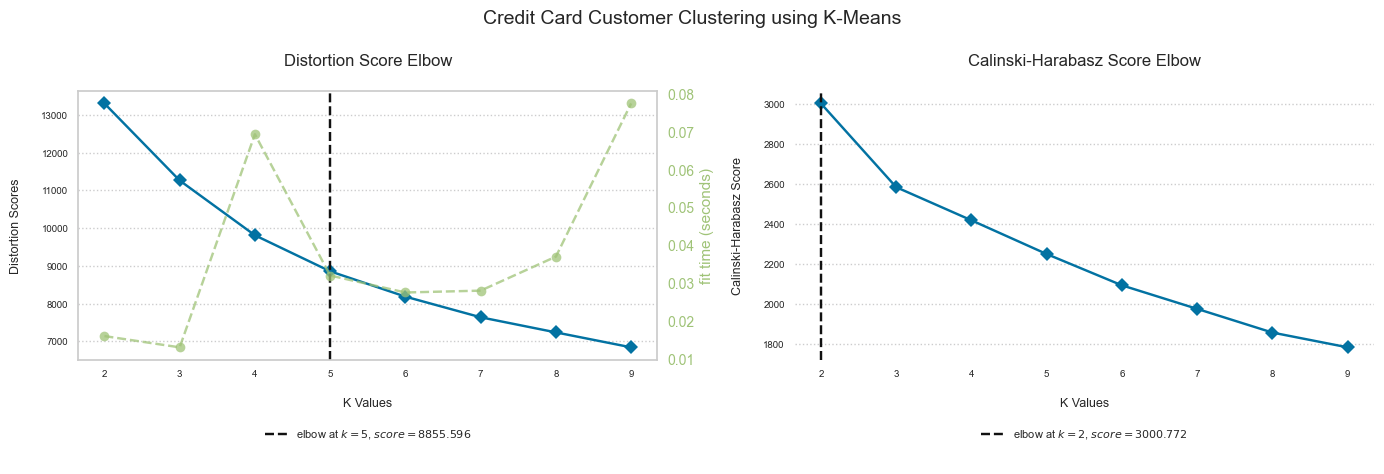

In [16]:
# K-Means Clustering

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Initialize the KElbowVisualizer with the KMeans model and the metric
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# --- Distortion Score ---
elbow_score = KElbowVisualizer(KMeans(random_state=32, max_iter=500), k=(2, 10), ax=ax1)
elbow_score.fit(W)
elbow_score.finalize()
elbow_score.ax.set_title('Distortion Score Elbow\n')
elbow_score.ax.tick_params(labelsize=7)
for text in elbow_score.ax.legend_.texts:
    text.set_fontsize(9)
for spine in elbow_score.ax.spines.values():
    spine.set_color('None')
elbow_score.ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), borderpad=2, frameon=False, fontsize=8)
elbow_score.ax.grid(axis='y', alpha=0.5, color='#9B9A9C', linestyle='dotted')
elbow_score.ax.grid(axis='x', alpha=0)
elbow_score.ax.set_xlabel('\nK Values', fontsize=9)
elbow_score.ax.set_ylabel('Distortion Scores\n', fontsize=9)

# --- Elbow Score (Calinski-Harabasz Index) ---
elbow_score_ch = KElbowVisualizer(KMeans(random_state=32, max_iter=500), k=(2, 10), metric='calinski_harabasz', timings=False, ax=ax2)
elbow_score_ch.fit(W)
elbow_score_ch.finalize()
elbow_score_ch.ax.set_title('Calinski-Harabasz Score Elbow\n')
elbow_score_ch.ax.tick_params(labelsize=7)
for text in elbow_score_ch.ax.legend_.texts:
    text.set_fontsize(9)
for spine in elbow_score_ch.ax.spines.values():
    spine.set_color('None')
elbow_score_ch.ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), borderpad=2, frameon=False, fontsize=8)
elbow_score_ch.ax.grid(axis='y', alpha=0.5, color='#9B9A9C', linestyle='dotted')
elbow_score_ch.ax.grid(axis='x', alpha=0)
elbow_score_ch.ax.set_xlabel('\nK Values', fontsize=9)
elbow_score_ch.ax.set_ylabel('Calinski-Harabasz Score\n', fontsize=9)

plt.suptitle('Credit Card Customer Clustering using K-Means', fontsize=14)
plt.tight_layout()
plt.show();

The "elbow" point is a heuristic used to identify the optimal number of clusters by looking for a point where the distortion score starts to decrease more slowly.
In the distortion score plot, the elbow appears around $k=5$. At this point, the reduction in distortion score begins to diminish, indicating that adding more clusters beyond $k=6$ may not significantly improve the clustering quality. 

The Calinski-Harabasz Index measures the ratio of the sum of between-cluster dispersion to the sum of within-cluster dispersion. Higher values indicate better-defined clusters.
The plot shows the Calinski-Harabasz Score decreasing as $k$ increases from 2 to 9, with a noticeable drop after $k=2$.

Given the two evaluation metrics, there is a discrepancy in the suggested optimal values for $k$. The distortion score suggests $k=5$, while the Calinski-Harabasz score suggests $k=2$. This discrepancy highlights the importance of considering multiple evaluation metrics and domain knowledge when selecting the optimal number of clusters.
If the goal is to achieve the most compact and well-separated clusters, $k=2$ might be preferable based on the Calinski-Harabasz score. However, if more detailed segmentation is needed for finer granularity in customer insights, $k=5$ might be more appropriate. More clusters (e.g. $k=5$) can provide more detailed segmentation, which might be beneficial for marketing strategies and personalized services.


In [17]:
# K-Means Clustering with Optimal K
# Initialize the KMeans model with the optimal number of clusters (k=5)
kmeans = KMeans(n_clusters=5, random_state=32, max_iter=500)

# Fit the KMeans model on the scaled dataset
y_kmeans = kmeans.fit_predict(W)

# Display the cluster centers
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=[f'NMF{i}' for i in range(1, 9)])
cluster_centers


,NMF1,NMF2,NMF3,NMF4,NMF5,NMF6,NMF7,NMF8
0,0.720441,0.776659,1.614967,1.120945,0.367502,1.054631,0.629480,0.444659
1,3.493367,1.279958,0.684349,0.570636,0.266530,1.972062,0.584613,0.408211
2,1.513461,1.007154,0.517495,0.939199,0.315156,2.414425,0.388576,0.424539
3,2.063643,1.202304,0.912452,0.691615,0.344898,0.960315,0.656049,0.517186
4,1.005703,1.274419,0.721799,1.127113,0.307753,1.417668,0.724642,0.294539


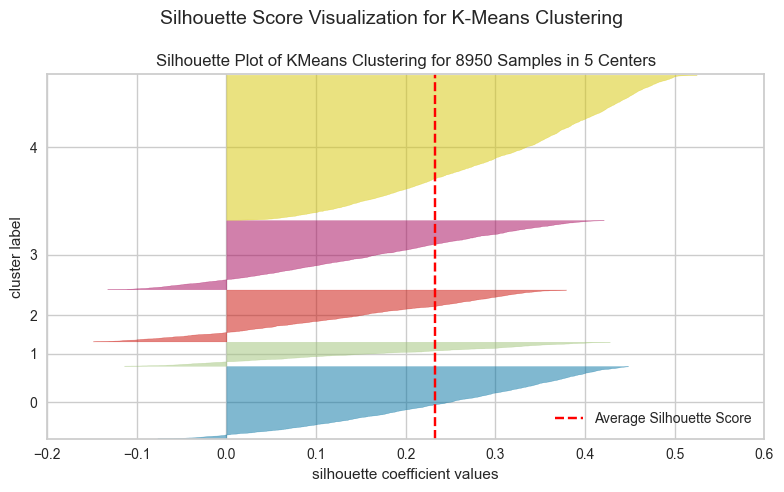

In [18]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
import numpy as np

# Silhouette Score Visualization
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

# Initialize the Silhouette Visualizer with the KMeans model
silhouette_visualizer = SilhouetteVisualizer(KMeans(n_clusters=5, random_state=32, max_iter=500), colors='yellowbrick', ax=ax)
silhouette_visualizer.fit(W)
silhouette_visualizer.finalize()

plt.suptitle('Silhouette Score Visualization for K-Means Clustering', fontsize=14)
plt.tight_layout()
plt.show()

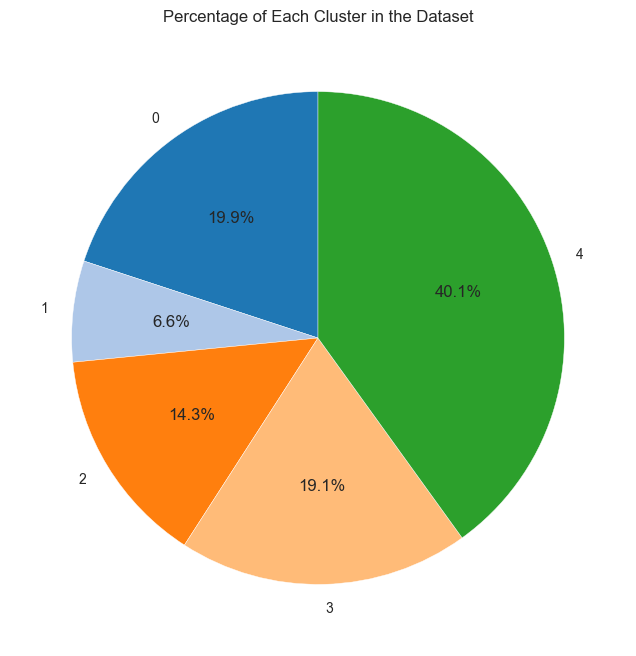

In [19]:
# percentage of each cluster in the dataset
cluster_percentage = pd.Series(y_kmeans).value_counts(normalize=True).sort_index() * 100

# Display the percentage of each cluster as part of the total dataset in a pie chart
plt.figure(figsize=(8, 8))
plt.pie(cluster_percentage, labels=cluster_percentage.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors)
plt.title('Percentage of Each Cluster in the Dataset')
plt.show()

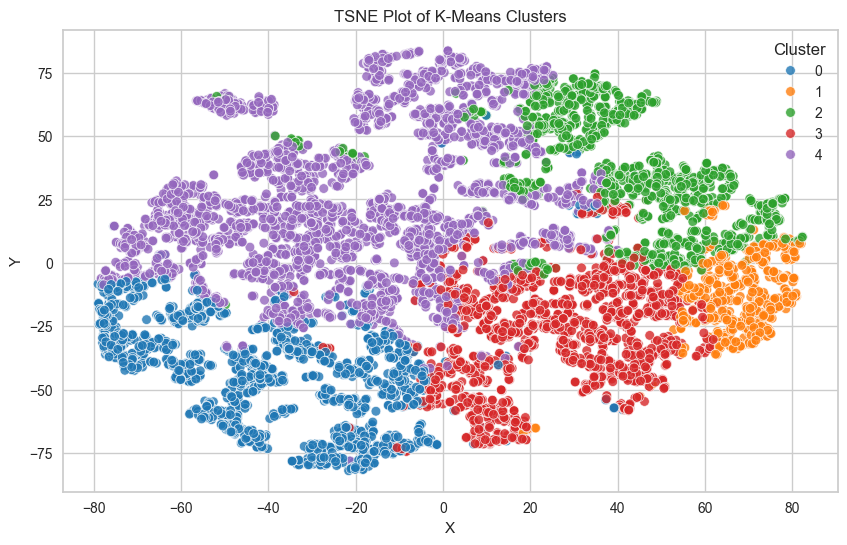

In [20]:
# tsne plot of the kmeans clusters
from sklearn.manifold import TSNE

# Initialize the TSNE model
tsne = TSNE(n_components=2, random_state=32)

# Fit and transform the TSNE model on the W matrix
W_tsne = tsne.fit_transform(W)

# Create a DataFrame with the TSNE-transformed data and the KMeans cluster labels
tsne_df = pd.DataFrame({'X': W_tsne[:, 0], 'Y': W_tsne[:, 1], 'Cluster': y_kmeans})

# Plot the TSNE clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tsne_df, x='X', y='Y', hue='Cluster', palette='tab10', legend='full', alpha=0.8)
plt.title('TSNE Plot of K-Means Clusters')
plt.show()

In [21]:
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score


# --- Evaluate Clustering Quality Function ---
def evaluate_clustering(X, y):
    db_index = round(davies_bouldin_score(X, y), 3)
    s_score = round(silhouette_score(X, y), 3)
    ch_index = round(calinski_harabasz_score(X, y), 3)
    return db_index, s_score, ch_index

# --- Evaluate K-Means Cluster Quality ---
db_kmeans, ss_kmeans, ch_kmeans = evaluate_clustering(df_scaled, y_kmeans)

# create dict of models and results
results = {
    'K-Means Clustering k=6': [db_kmeans, ss_kmeans, ch_kmeans]
}

# --- Display Evaluation Results ---
print('.: K-Means Clustering Evaluation :.')
print('*' * 31)
print(f'Davies-Bouldin Index: {db_kmeans}')
print(f'Silhouette Score: {ss_kmeans}')
print(f'Calinski-Harabasz Index: {ch_kmeans}')
print('*' * 31)

.: K-Means Clustering Evaluation :.
*******************************
Davies-Bouldin Index: 2.449
Silhouette Score: 0.1
Calinski-Harabasz Index: 667.231
*******************************


The silhouette coefficient values range from approximately -0.2 to 0.6, with an average silhouette score of around 0.1.
A silhouette score close to 1 indicates that the sample is well-clustered.
Scores around 0 suggest that the sample is on or very close to the decision boundary between two neighboring clusters.
Negative values indicate that those samples might have been assigned to the wrong cluster.

**Cluster Quality:**

- Cluster 4: This cluster appears to have the highest silhouette scores, indicating that it is well-defined and compact.
- Clusters 1, 2, and 3: These clusters exhibit a wide range of silhouette values, indicating variability in cluster quality.
- Cluster 0: This cluster contains several negative silhouette values, suggesting that some points in this cluster may not be well-placed and might belong to neighboring clusters.

**Cluster Proportions:**

- Cluster 4: This is the largest cluster, comprising 40.1% of the samples, suggesting that a significant portion of the data shares common characteristics that are well-captured by this cluster.
- Clusters 0 and 3: These clusters are also relatively large, containing 19.9% and 19.1% of the samples, respectively.
- Cluster 2: This cluster represents a medium-sized segment, with 14.3% of the samples.
- Cluster 1: This is the smallest cluster, containing 6.6% of the samples, indicating a more distinct and smaller group.

**t-SNE Plot for K-Means Clusters**

The t-SNE Plot provides a two-dimensional visualization of the clusters formed by the K-Means algorithm, helping to identify the spatial separation and cohesion of the clusters.

- Cluster Cohesion:
    - The plot shows distinct regions for each cluster, indicating that the clusters are well-separated in the reduced two-dimensional space.
    - Cluster 4 is visually distinct and occupies a significant portion of the plot, aligning with its large size as indicated in the pie chart.

- Cluster Separation:
    - Clusters 1 and 2 are relatively small but appear well-separated from other clusters.
    - Clusters 0 and 3 show some overlap, suggesting that these clusters may have points that are close to each other in the feature space, indicating potential areas for further refinement.

**Overall Clustering Quality:**

The silhouette plot, combined with the evaluation metrics, suggests that the clustering quality is suboptimal. The average silhouette score of 0.1 is particularly concerning, as it indicates that many samples are not well-clustered.
The Davies-Bouldin Index of 2.449 and the Calinski-Harabasz Index of 667.231 further indicate that the clusters are not well-separated and compact.

Cluster Characteristics and Implications:

- Cluster 4: The largest cluster with 40.1% of the samples and relatively higher silhouette scores. This cluster represents a significant portion of the dataset and appears to be well-defined.
- Clusters 0 and 3: These clusters are also large but show mixed silhouette scores, indicating variability within these groups. Further refinement or a different clustering approach may be needed.
- Cluster 1: The smallest cluster, representing a distinct segment with potential outliers or unique data points.
- Cluster 2: Medium-sized clusters with varying silhouette scores, suggesting that some points within these clusters may not be optimally placed.

#### 4.2 K-Means Clustering Hyperparameter Tuning

In [22]:
# K-Means Clustering Hyperparameter Tuning k=2 to 4
from sklearn.cluster import KMeans

# Initialize the KMeans model with the range of clusters
k_range = range(2, 5)

# Fit the KMeans model for each k
kmeans_models = [KMeans(n_clusters=k, random_state=32, max_iter=500).fit(W) for k in k_range]

# Get the cluster assignments for each model
y_kmeans_models = [model.predict(W) for model in kmeans_models]

# Evaluate the clustering quality for each model
db_scores = [davies_bouldin_score(W, y) for y in y_kmeans_models]
ss_scores = [silhouette_score(W, y) for y in y_kmeans_models]
ch_scores = [calinski_harabasz_score(W, y) for y in y_kmeans_models]

# Display the evaluation results
scores = pd.DataFrame({'Clusters (k)': k_range, 'Davies-Bouldin Index': db_scores, 'Silhouette Score': ss_scores, 'Calinski-Harabasz Index': ch_scores})

#add to results dict
for i, k in enumerate(k_range):
    results[f'K-Means Clustering k={k}'] = [db_scores[i], ss_scores[i], ch_scores[i]]
    
# print results dict in a tabular form
results_df = pd.DataFrame(results).T
results_df.columns = ['Davies-Bouldin Index', 'Silhouette Score', 'Calinski-Harabasz Index']
results_df



,Davies-Bouldin Index,Silhouette Score,Calinski-Harabasz Index
K-Means Clustering k=6,2.449000,0.100000,667.231000
K-Means Clustering k=2,1.399838,0.326377,3000.771688
K-Means Clustering k=3,1.437098,0.235059,2583.317162
K-Means Clustering k=4,1.355769,0.241609,2418.080899


K=2 appears to be the optimal number of clusters based on all three evaluation metrics (DBI, Silhouette Score, and CHI). This suggests that the dataset naturally groups into two well-separated clusters. 

While $K=2$ has been identified as the optimal number of clusters based on clustering metrics, it's crucial to consider whether this segmentation is meaningful and actionable in a business context, particularly in customer segmentation.
- The number of clusters should align with the business objectives. For customer segmentation, the goal is often to identify distinct groups of customers that can be targeted with tailored marketing strategies, products, or services.
- Customer bases are typically diverse, and segmenting them into only two groups might oversimplify the variation in customer behaviors, preferences, and needs. This could lead to broad and less actionable insights.
- More clusters generally provide finer granularity, allowing for more targeted and personalized approaches. However, too many clusters can lead to complexity and difficulties in managing and interpreting the segments.

While $K=2$ provides the best clustering metrics, it may not be sufficiently granular for detailed customer segmentation. However, it can serve as a useful starting point for initial analysis. To ensure meaningful and actionable customer segmentation, consider the following steps:
- Start with $K=2$: Use the broad segmentation to identify major groups of customers.
- Analyze Cluster Characteristics: Examine the characteristics of each cluster to understand the key differences.
 - Subdivide Clusters: Further divide the broad clusters into smaller, more detailed segments based on specific business needs and customer diversity.
By following this approach, we can leverage the simplicity of $K=2$ for initial insights while also ensuring that the final segmentation is sufficiently detailed and actionable for strategic decision-making.

#### 4.3 DBSCAN Clustering

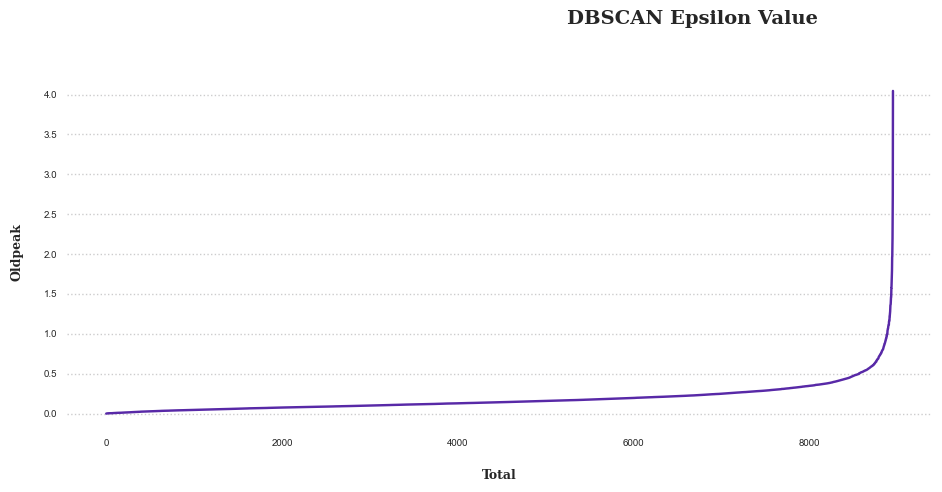

In [23]:
from matplotlib.patches import Rectangle


# --- Define Epsilon Values ---
def epsilon():
    
    # --- Calculate Nearest Neighbors ---
    neighbors=NearestNeighbors(n_neighbors=2)
    nbrs=neighbors.fit(W)
    distances, indices=nbrs.kneighbors(W)
    distances=np.sort(distances, axis = 0)
    
    # --- Figure Settings ---
    bbox=dict(boxstyle='round', pad=0.3, color='#FFDA47', alpha=0.6)
    txt1=dict(textcoords='offset points', va='center', ha='center', fontfamily='serif', style='italic')
    txt2=dict(textcoords='offset points', va='center', fontfamily='serif', style='italic')
    kw=dict(arrowstyle='Simple, tail_width=0.1, head_width=0.4, head_length=1', color='black')
    text_style=dict(fontweight='bold', fontfamily='serif')
    fig=plt.figure(figsize=(14, 5))
    
    # --- Epsilon Plot ---
    distances_1=distances[:, 1]
    ax1=fig.add_subplot(1, 3, (1, 2))
    plt.plot(distances_1, color='#5829A7')
    plt.xlabel('\nTotal', fontsize=9, **text_style)
    plt.ylabel('Oldpeak\n', fontsize=9, **text_style)
    #ax1.add_patch(Rectangle((8600, -0.3), 500, 2.5, edgecolor='#FFCC00', fill=False, lw=1.5))
    #plt.annotate('The optimal Epsilon value is\nat the point of maximum curvature.', xy=(6300, 6), xytext=(1, 1), fontsize=10, bbox=bbox, **txt1)
    #plt.annotate('', xy=(8600, 1.8), xytext=(6300, 5.1), arrowprops=kw)
    for spine in ax1.spines.values():
        spine.set_color('None')
    plt.grid(axis='y', alpha=0.5, color='#9B9A9C', linestyle='dotted')
    plt.grid(axis='x', alpha=0)
    plt.tick_params(labelsize=7)
    
    
    
    plt.suptitle('DBSCAN Epsilon Value\n', fontsize=14, **text_style)
    plt.tight_layout()
    plt.show();

# --- Calling Epsilon Functions ---
epsilon();

The plot shown is typically used to determine the optimal $\epsilon$ value for the DBSCAN clustering algorithm. This is usually achieved through analyzing the k-distance graph, where the distances to the $k-th$ nearest neighbors of each point are plotted in ascending order. The goal is to identify the "elbow" point in the plot, where the distance starts to increase sharply. This elbow is indicative of the optimal $\epsilon$ value. The optimal $\epsilon$ value is generally selected at the point just before the elbow. This choice ensures that most data points are considered core points within clusters while minimizing the inclusion of noise points. The ideal $\epsilon$ value for DBSCAN should be chosen at the point just before the sharp increase in the k-distance curve, which occurs around the 8000th point in the plot. This point ensures that the clustering algorithm identifies dense regions as clusters while minimizing the inclusion of noise. We will select $\epsilon = 1.5$ as the optimal value for the DBSCAN clustering algorithm based on the k-distance graph analysis.

In [24]:
from sklearn.cluster import DBSCAN
from matplotlib import patches

# --- Implementing DBSCAN ---
dbscan = DBSCAN(eps=1.5, min_samples=4)
y_dbscan = dbscan.fit_predict(W)

# evaluate the clustering quality
db_dbscan, ss_dbscan, ch_dbscan = evaluate_clustering(df_scaled, y_dbscan)

# add to results dict
results['DBSCAN Clustering'] = [db_dbscan, ss_dbscan, ch_dbscan]

# --- Display Evaluation Results ---
print('.: DBSCAN Clustering Evaluation :.')
print('*' * 31)
print(f'Davies-Bouldin Index: {db_dbscan}')
print(f'Silhouette Score: {ss_dbscan}')
print(f'Calinski-Harabasz Index: {ch_dbscan}')
print('*' * 31)

.: DBSCAN Clustering Evaluation :.
*******************************
Davies-Bouldin Index: 1.439
Silhouette Score: 0.789
Calinski-Harabasz Index: 430.507
*******************************


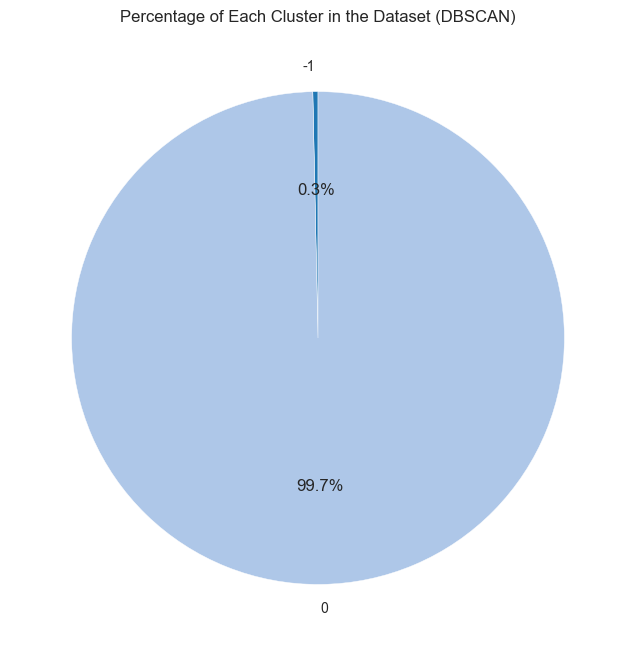

In [25]:
# percentage of each cluster in the dataset
cluster_percentage_dbscan = pd.Series(y_dbscan).value_counts(normalize=True).sort_index() * 100

# Display the percentage of each cluster as part of the total dataset in a pie chart
plt.figure(figsize=(8, 8))
plt.pie(cluster_percentage_dbscan, labels=cluster_percentage_dbscan.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors)
plt.title('Percentage of Each Cluster in the Dataset (DBSCAN)')
plt.show()

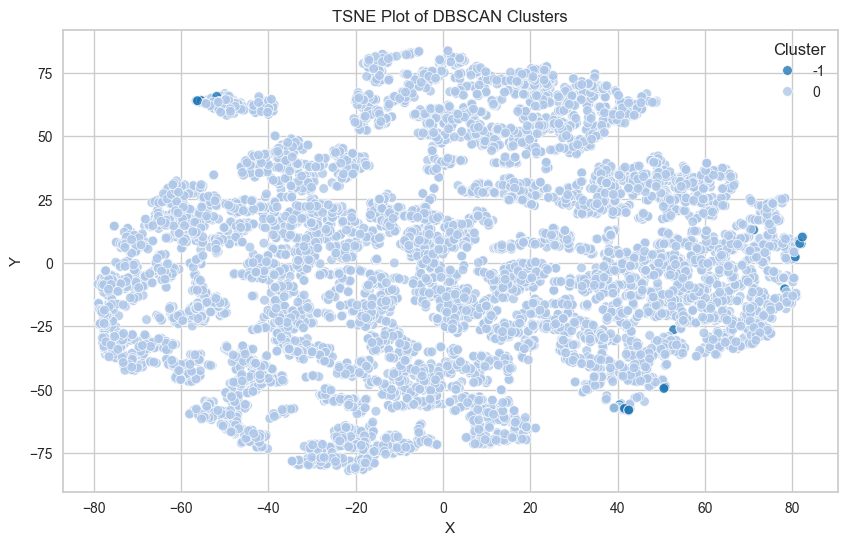

In [26]:
# tsne plot of the dbscan clusters
from sklearn.manifold import TSNE

# Initialize the TSNE model
tsne = TSNE(n_components=2, random_state=32)

# Fit and transform the TSNE model on the W matrix
W_tsne = tsne.fit_transform(W)

# Create a DataFrame with the TSNE-transformed data and the DBSCAN cluster labels
tsne_df_dbscan = pd.DataFrame({'X': W_tsne[:, 0], 'Y': W_tsne[:, 1], 'Cluster': y_dbscan})

# Plot the TSNE clusters    
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tsne_df_dbscan, x='X', y='Y', hue='Cluster', palette='tab20', legend='full', alpha=0.8)
plt.title('TSNE Plot of DBSCAN Clusters')
plt.show()

Given the current results, DBSCAN appears to identify a single large cluster with high cohesion and a small number of noise points. This suggests that the dataset is highly homogeneous, or the chosen parameters for DBSCAN (epsilon and min_samples) may not be optimal for capturing more detailed clustering patterns. Further exploration of the DBSCAN parameters or alternative clustering algorithms may be necessary to uncover more meaningful customer segments.

#### 4.4 Agglomerative Clustering

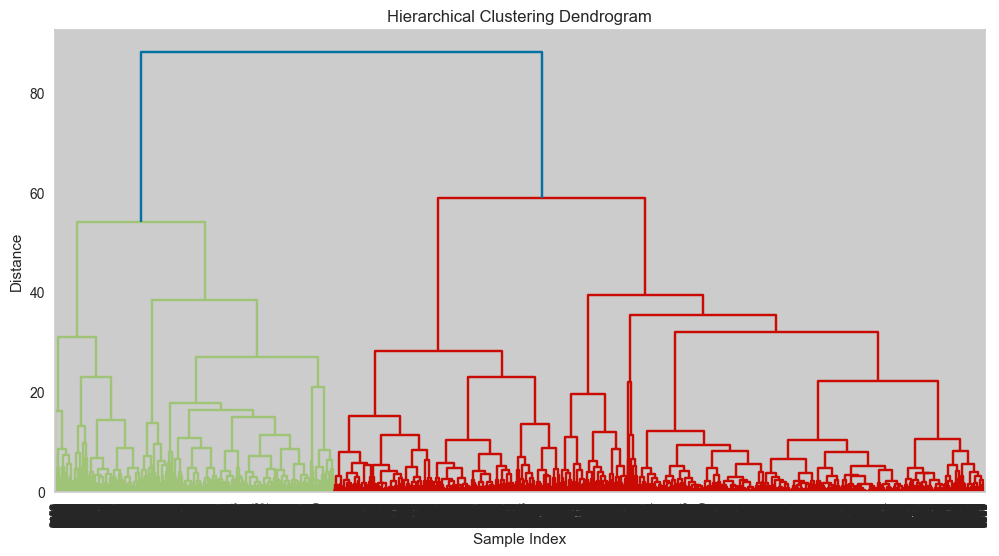

In [28]:
# plot dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical/agglomerative clustering
Z = linkage(W, method='ward', metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z, leaf_rotation=90, leaf_font_size=8)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


Optimal Number of Clusters: 74


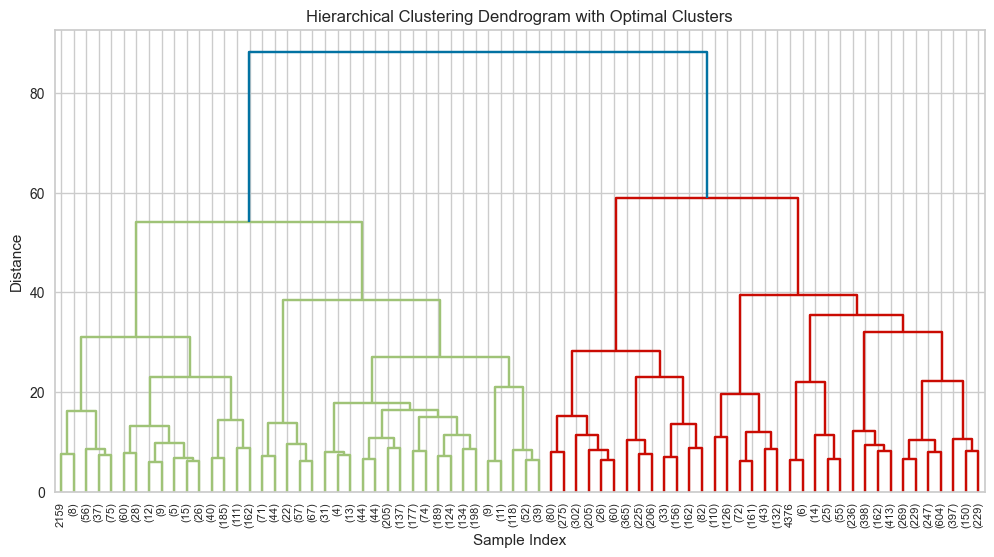

In [29]:
# plot dendrogram with optimal number of clusters
from scipy.cluster.hierarchy import fcluster

# Determine the optimal number of clusters
max_d = 6
clusters = fcluster(Z, max_d, criterion='distance')

# Display the number of clusters
n_clusters = len(np.unique(clusters))
print(f'Optimal Number of Clusters: {n_clusters}')

# Plot the dendrogram with the optimal number of clusters
plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode='lastp', p=n_clusters, show_leaf_counts=True, leaf_rotation=90, leaf_font_size=8)
plt.title('Hierarchical Clustering Dendrogram with Optimal Clusters')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


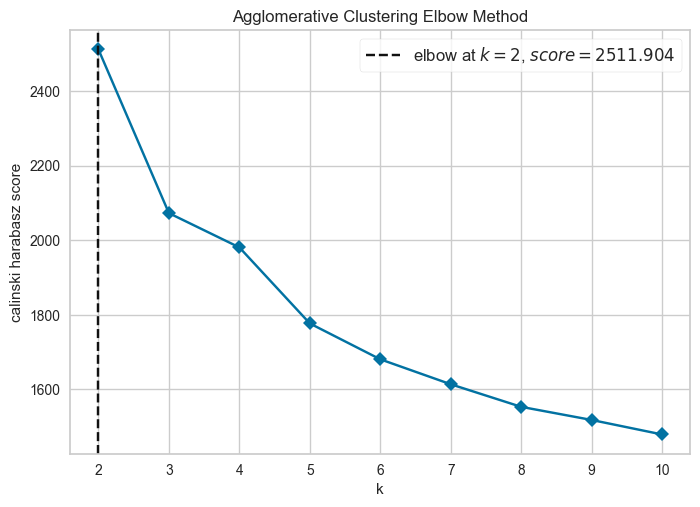

In [30]:
# find CHI elbow
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering

# Initialize the AgglomerativeClustering model
model = AgglomerativeClustering()

# Initialize the KElbowVisualizer with the AgglomerativeClustering model and the metric
elbow_visualizer = KElbowVisualizer(model, metric='calinski_harabasz', timings=False)

# Fit the visualizer to the data
elbow_visualizer.fit(W)
elbow_visualizer.finalize()
plt.title('Agglomerative Clustering Elbow Method')
plt.show()


A cutoff at 40 on the dendrogram results in approximately 6 clusters. This is observed where the horizontal line at the 40 distance level intersects the dendrogram branches.
The clusters formed are indicated by the different color groupings in the dendrogram (blue, red, green, etc.). The CHI elbow plot shows a distinct elbow at $k=2$, where the CHI score is the highest (2511.904). This suggests that 2 clusters may be optimal based on the CHI score alone.
The CHI score decreases as the number of clusters increases, indicating that higher values of $k$ result in less compact and well-separated clusters.

The dendrogram suggests a more granular segmentation with 6 clusters, while the CHI elbow plot indicates that 2 clusters might be optimal for maintaining high cluster compactness and separation.This conflict arises because different metrics and visualizations capture different aspects of clustering quality. The dendrogram focuses on the hierarchical relationship and the distances at which clusters merge, while the CHI score evaluates the ratio of between-cluster dispersion to within-cluster dispersion. The choice between 2 and 6 clusters depends on the desired level of granularity and the trade-off between cluster compactness and separation. We can perform an iterative analysis, possibly experimenting with $k=4$ as a compromise between the dendrogram and CHI plot, and evaluate the practical utility of the resulting clusters.

In [31]:
# Agglomerative Clustering with k=4

from sklearn.cluster import AgglomerativeClustering

# Initialize the Agglomerative Clustering model with 4 clusters
agg_clustering = AgglomerativeClustering(n_clusters=4)

# Fit the model to the scaled dataset
y_agg = agg_clustering.fit_predict(W)

# Evaluate the clustering quality
db_agg, ss_agg, ch_agg = evaluate_clustering(df_scaled, y_agg)

# Add to results dict
results['Agglomerative Clustering k=4'] = [db_agg, ss_agg, ch_agg]

# Display the evaluation results
print('.: Agglomerative Clustering Evaluation :.')
print('*' * 31)
print(f'Davies-Bouldin Index: {db_agg}')
print(f'Silhouette Score: {ss_agg}')
print(f'Calinski-Harabasz Index: {ch_agg}')
print('*' * 31)

.: Agglomerative Clustering Evaluation :.
*******************************
Davies-Bouldin Index: 2.395
Silhouette Score: 0.092
Calinski-Harabasz Index: 724.657
*******************************


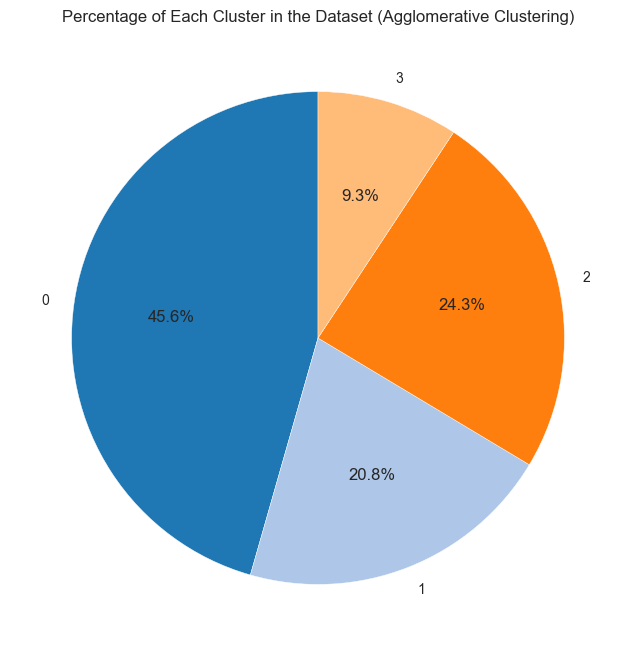

In [32]:
# percentage of each cluster in the dataset
cluster_percentage_agg = pd.Series(y_agg).value_counts(normalize=True).sort_index() * 100

# Display the percentage of each cluster as part of the total dataset in a pie chart
plt.figure(figsize=(8, 8))
plt.pie(cluster_percentage_agg, labels=cluster_percentage_agg.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors)
plt.title('Percentage of Each Cluster in the Dataset (Agglomerative Clustering)')
plt.show()


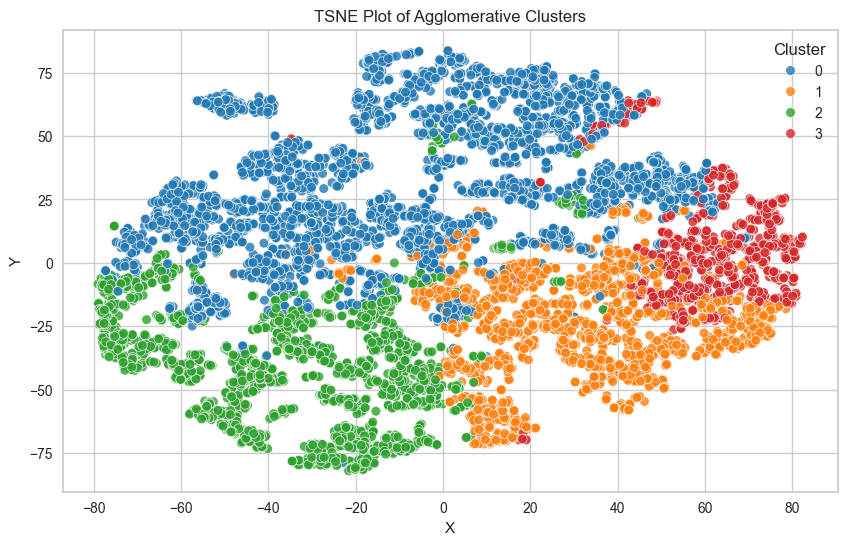

In [33]:
# tsne plot of the agglomerative clusters
from sklearn.manifold import TSNE

# Initialize the TSNE model
tsne = TSNE(n_components=2, random_state=32)

# Fit and transform the TSNE model on the W matrix
W_tsne = tsne.fit_transform(W)

# Create a DataFrame with the TSNE-transformed data and the Agglomerative cluster labels
tsne_df_agg = pd.DataFrame({'X': W_tsne[:, 0], 'Y': W_tsne[:, 1], 'Cluster': y_agg})

# Plot the TSNE clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tsne_df_agg, x='X', y='Y', hue='Cluster', palette='tab10', legend='full', alpha=0.8)
plt.title('TSNE Plot of Agglomerative Clusters')
plt.show()

**Cluster Proportions:**

- Cluster 0: Contains 45.6% of the samples, indicating that this is the largest cluster.
- Cluster 2: The second-largest cluster, containing 24.3% of the samples.
- Cluster 1: Comprises 20.8% of the samples.
- Cluster 3: The smallest cluster, containing 9.3% of the samples.

**Cluster Cohesion:**

- The plot shows distinct regions for each cluster, indicating that the clusters are reasonably well-separated in the reduced two-dimensional space.
- Cluster 0 (blue) and Cluster 1 (green) show significant separation, suggesting distinct groupings of data points.

**Cluster Separation:**

Cluster 2 (brown) and Cluster 3 (red) also appear well-separated, although there are some overlaps at the boundaries, indicating potential areas where points are closer to the decision boundary between clusters.

**Overall Clustering Quality:**

- The low silhouette score (0.092) indicates suboptimal clustering quality, with many points not being well-clustered and close to the decision boundaries.
- The Davies-Bouldin Index (2.395) suggests that the clusters are not well-separated and there is significant similarity between clusters.
- The Calinski-Harabasz Index (724.657) indicates moderate clustering quality in terms of compactness and separation.

**Cluster Characteristics and Implications:**

- Cluster 0: The largest cluster, representing almost half of the dataset, suggesting that a significant portion of the data shares common characteristics.
- Cluster 2: A sizable cluster, suggesting another major grouping within the data.
- Cluster 1: Represents a substantial portion of the data, indicating another distinct segment.
- Cluster 3: The smallest cluster, indicating a more distinct and less common grouping.

The agglomerative clustering results indicate that while there are distinct clusters within the data, the overall clustering quality is suboptimal. The clusters are not well-separated, and many points are close to the decision boundaries. Further refinement and validation are recommended to improve the clustering quality and ensure the clusters are meaningful for customer segmentation.

In [34]:
# Display the results of all clustering models
results_df = pd.DataFrame(results).T
results_df.columns = ['Davies-Bouldin Index', 'Silhouette Score', 'Calinski-Harabasz Index']
results_df

,Davies-Bouldin Index,Silhouette Score,Calinski-Harabasz Index
K-Means Clustering k=6,2.449000,0.100000,667.231000
K-Means Clustering k=2,1.399838,0.326377,3000.771688
K-Means Clustering k=3,1.437098,0.235059,2583.317162
K-Means Clustering k=4,1.355769,0.241609,2418.080899
DBSCAN Clustering,1.439000,0.789000,430.507000
Agglomerative Clustering k=4,2.395000,0.092000,724.657000


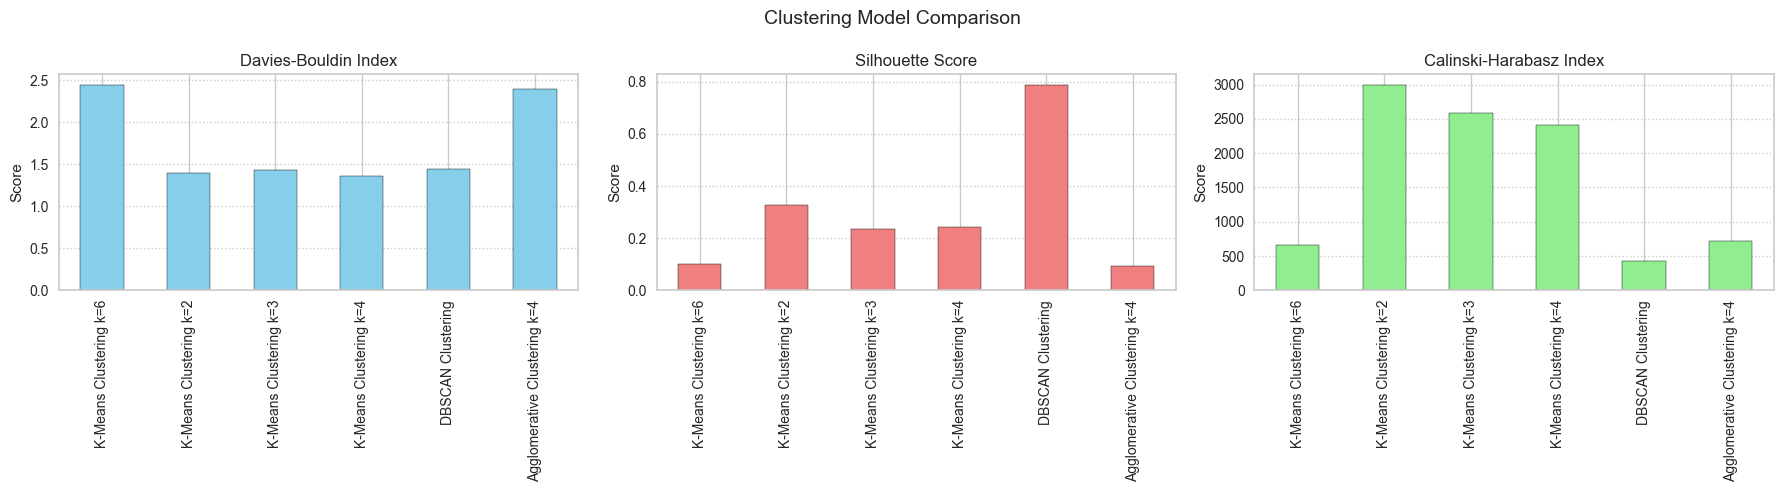

In [35]:
# plot model comparison
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# --- Davies-Bouldin Index ---
results_df['Davies-Bouldin Index'].plot(kind='bar', ax=ax[0], color='skyblue', edgecolor='black')
ax[0].set_title('Davies-Bouldin Index')
ax[0].set_ylabel('Score')
ax[0].grid(axis='y', alpha=0.5, color='#9B9A9C', linestyle='dotted')

# --- Silhouette Score ---
results_df['Silhouette Score'].plot(kind='bar', ax=ax[1], color='lightcoral', edgecolor='black')
ax[1].set_title('Silhouette Score')
ax[1].set_ylabel('Score')
ax[1].grid(axis='y', alpha=0.5, color='#9B9A9C', linestyle='dotted')

# --- Calinski-Harabasz Index ---
results_df['Calinski-Harabasz Index'].plot(kind='bar', ax=ax[2], color='lightgreen', edgecolor='black')
ax[2].set_title('Calinski-Harabasz Index')
ax[2].set_ylabel('Score')
ax[2].grid(axis='y', alpha=0.5, color='#9B9A9C', linestyle='dotted')

plt.suptitle('Clustering Model Comparison', fontsize=14)
plt.tight_layout()
plt.show()

### 5. Summary and Insights
#### 5.1 Clustering Model Evaluation
The evaluation of the clustering models (K-Means, DBSCAN, and Agglomerative Clustering) provides insights into the quality and characteristics of the identified customer segments. The key findings from the evaluation are as follows:

**K-Means Clustering:**
- Optimal Number of Clusters: The elbow method and the Calinski-Harabasz Index suggest different optimal numbers of clusters ($k=5$ and $k=2$, respectively).
- Cluster Characteristics: Cluster 4 is the largest and most well-defined, while Cluster 0 shows some negative silhouette scores.
- Cluster Proportions: Cluster 4 is the largest, representing 40.1% of the dataset.
- TSNE Plot: Shows distinct clusters but also some overlap between Clusters 0 and 3.
- Evaluation Metrics: The average silhouette score of 0.1 indicates suboptimal clustering quality.
- Insights: The clustering quality could be improved by refining the segmentation or exploring alternative clustering algorithms.

**DBSCAN Clustering:**
- Optimal $\epsilon$ Value: Identified as 1.5 based on the k-distance graph analysis.
- Cluster Characteristics: Forms a single large cluster with high cohesion and some noise points.
- Insights: The dataset may be highly homogeneous, or the DBSCAN parameters may need adjustment for more detailed clustering patterns.
- Evaluation Metrics: The clustering quality is suboptimal, with a single large cluster and noise points.
- Recommendations: Further exploration of DBSCAN parameters or alternative clustering methods may be necessary.

**Agglomerative Clustering:**
- Optimal Number of Clusters: The dendrogram suggests 6 clusters, while the CHI elbow plot indicates 2 clusters as optimal.
- Cluster Characteristics: Shows distinct regions for each cluster, with varying levels of separation and cohesion.
- Insights: The clustering quality is suboptimal, with low silhouette scores and significant similarity between clusters.
- Recommendations: Further refinement and validation are needed to improve clustering quality and ensure meaningful segmentation.

#### 5.2 Customer Segmentation Insights
Based on the clustering results and evaluation metrics, the following insights can be derived for customer segmentation:

- **Cluster Characteristics:** Each clustering model identifies distinct customer segments with varying sizes and characteristics.
- **Segment Proportions:** The percentage of customers in each cluster provides insights into the distribution of customer groups.
- **Cluster Cohesion:** The spatial separation and cohesion of clusters in the TSNE plots indicate the distinctiveness of each segment.
- **Cluster Separation:** Overlaps between clusters suggest potential areas for refinement or further segmentation.
- **Clustering Quality:** Evaluation metrics such as the silhouette score, Davies-Bouldin Index, and Calinski-Harabasz Index provide quantitative measures of clustering quality.
- **Actionable Insights:** The clustering results can be used to tailor marketing strategies, product offerings, and customer experiences based on customer segments.
- **Iterative Analysis:** Iterative analysis and validation of clustering results are essential to ensure meaningful and actionable customer segmentation.
- **Business Impact:** Effective customer segmentation can lead to improved customer engagement, personalized services, and targeted marketing campaigns.

Conclusion:
For the given dataset, K-Means Clustering with $k=2$ is the optimal model for customer segmentation, offering the best balance of cluster separation, cohesion, and compactness. However, Agglomerative Clustering with $k=4$ also provides meaningful insights into customer segments, with distinct clusters and proportions. DBSCAN clustering may require further parameter tuning or exploration to capture more detailed clustering patterns.

By leveraging the insights from clustering models and evaluation metrics, businesses can gain a deeper understanding of their customer base, identify key customer segments, and tailor strategies to meet the diverse needs and preferences of their customers. The iterative nature of clustering analysis allows for continuous refinement and optimization of customer segmentation strategies to drive business growth and enhance customer satisfaction. 